# Exploración de Datos — Airbnb Ciudad de México

**Archivo:** `exploracion_airbnb.ipynb`

Este cuaderno realiza el EDA (punto 2) del Taller: entendimiento general, calidad de datos, transformaciones potenciales y documentación de hallazgos.

**Datasets:** `listings.csv`, `reviews.csv`, `calendar.csv`.

**Objetivo:** Comprender estructura, calidad y distribución antes de transformar.

## 2.1 Entendimiento general de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
base_path = '/mnt/data'
listings = pd.read_csv(f'{base_path}/listings.csv', low_memory=False)
reviews  = pd.read_csv(f'{base_path}/reviews.csv',  low_memory=False)
calendar = pd.read_csv(f'{base_path}/calendar.csv', low_memory=False)
print('Shapes:')
print(' - listings:', listings.shape)
print(' - reviews :', reviews.shape)
print(' - calendar:', calendar.shape)
display(listings.head(3))
display(reviews.head(3))
display(calendar.head(3))
print('\nINFO listings:')
print(listings.info())
print('\nINFO reviews:')
print(reviews.info())
print('\nINFO calendar:')
print(calendar.info())


Shapes:
 - listings: (26067, 79)
 - reviews : (26918, 6)
 - calendar: (167535, 7)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250319150644,2025-03-21,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...","$3,982.00",1,7,1,1,7,7,1.0,7.0,NaN,t,28,58,88,363,2025-03-21,0,0,0,284,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250319150644,2025-03-20,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,13.0,13.0,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.41162,-99.17794,Entire home,Entire home/apt,14,NaN,5.5 baths,5.0,NaN,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin...",NaN,1,365,1,1,365,365,1.0,365.0,NaN,t,29,59,89,364,2025-03-20,65,1,0,286,0,6,NaN,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,NaN,f,9,4,2,0,0.40
2,56074,https://www.airbnb.com/rooms/56074,20250319150644,2025-03-20,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a day,88%,100%,f,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,1.0,5.0,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,NaN,19.43977,-99.15605,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...",$585.00,15,250,15,15,250,250,15.0,250.0,NaN,t,26,56,86,361,2025-03-20,84,1,1,283,0,30,17550.0,2011-04-02,2025-02-27,4.87,4.95,4.88,4.98,4.94,4.76,

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken..."
2,2992450,27434334,2015-03-04,45406,Altay,The apartment was very clean and convenient to...


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2992450,2025-08-04,f,NaN,NaN,28,1125
1,2992450,2025-08-05,f,NaN,NaN,28,1125
2,2992450,2025-08-06,f,NaN,NaN,28,1125



INFO listings:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26067 entries, 0 to 26066
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26067 non-null  int64  
 1   listing_url                                   26067 non-null  object 
 2   scrape_id                                     26067 non-null  int64  
 3   last_scraped                                  26067 non-null  object 
 4   source                                        26067 non-null  object 
 5   name                                          26067 non-null  object 
 6   description                                   25300 non-null  object 
 7   neighborhood_overview                         14391 non-null  object 
 8   picture_url                                   26067 non-null  object 
 9   host_id                                       26067 non-null 

## 2.2 Calidad de datos: nulos, duplicados y atípicos

In [2]:
# Valores nulos por columna (top 20 más nulos)
def top_nulls(df, k=20):
    return df.isna().sum().sort_values(ascending=False).head(k)
print('Nulos — listings:')
display(top_nulls(listings))
print('Nulos — reviews:')
display(top_nulls(reviews))
print('Nulos — calendar:')
display(top_nulls(calendar))

# Duplicados (globales y por claves comunes si existen)
dups_listings = listings.duplicated().sum()
dups_reviews  = reviews.duplicated().sum()
dups_calendar = calendar.duplicated().sum()
print(f'Duplicados listings (global): {dups_listings}')
print(f'Duplicados reviews  (global): {dups_reviews}')
print(f'Duplicados calendar (global): {dups_calendar}')

# Duplicados por identificadores típicos
if 'id' in listings.columns:
    print('Duplicados por id en listings:', listings.duplicated(subset=['id']).sum())
if set(['listing_id','id']).issubset(reviews.columns):
    print('Duplicados por (listing_id,id) en reviews:', reviews.duplicated(subset=['listing_id','id']).sum())
if set(['listing_id','date']).issubset(calendar.columns):
    print('Duplicados por (listing_id,date) en calendar:', calendar.duplicated(subset=['listing_id','date']).sum())

# Parseo seguro de precios numéricos (si existen)
def to_numeric_price(s):
    if s is None: return np.nan
    if isinstance(s, (int, float)): return s
    return pd.to_numeric(str(s).replace('$','').replace(',','').strip(), errors='coerce')

price_cols = [c for c in ['price','adjusted_price'] if c in calendar.columns]
for c in price_cols:
    calendar[c+'_num'] = calendar[c].apply(to_numeric_price)

list_price_cols = [c for c in ['price'] if c in listings.columns]
for c in list_price_cols:
    listings[c+'_num'] = listings[c].apply(to_numeric_price)

# Detección IQR de outliers en variables clave si existen
def iqr_outliers(series):
    s = series.dropna()
    if s.empty: return {'count':0,'lower':np.nan,'upper':np.nan}
    Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    count = ((s < lower) | (s > upper)).sum()
    return {'count': int(count), 'lower': float(lower), 'upper': float(upper)}

eda_targets_listings = []
if 'minimum_nights' in listings.columns: eda_targets_listings.append('minimum_nights')
if 'availability_365' in listings.columns: eda_targets_listings.append('availability_365')
if 'price_num' in listings.columns: eda_targets_listings.append('price_num')

outlier_report = {}
for col in eda_targets_listings:
    outlier_report[col] = iqr_outliers(listings[col])
print('Outliers (listings) por IQR:')
print(outlier_report)

eda_targets_calendar = [c for c in ['price_num','adjusted_price_num','minimum_nights','maximum_nights'] if c in calendar.columns]
outlier_report_cal = {}
for col in eda_targets_calendar:
    outlier_report_cal[col] = iqr_outliers(calendar[col])
print('Outliers (calendar) por IQR:')
print(outlier_report_cal)


Nulos — listings:


neighbourhood_group_cleansed    26067
calendar_updated                26067
license                         26067
host_neighbourhood              12192
neighbourhood                   11676
neighborhood_overview           11676
host_about                      10456
host_location                    5480
beds                             4022
bathrooms                        4005
estimated_revenue_l365d          3999
price                            3999
host_response_rate               3504
host_response_time               3504
review_scores_checkin            3262
review_scores_value              3262
review_scores_location           3262
review_scores_accuracy           3262
review_scores_cleanliness        3262
review_scores_communication      3262
dtype: int64

Nulos — reviews:


comments         8
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
dtype: int64

Nulos — calendar:


price             167535
adjusted_price    167535
listing_id             0
date                   0
available              0
minimum_nights         0
maximum_nights         0
dtype: int64

Duplicados listings (global): 0
Duplicados reviews  (global): 0
Duplicados calendar (global): 0
Duplicados por id en listings: 0
Duplicados por (listing_id,id) en reviews: 0
Duplicados por (listing_id,date) en calendar: 0


Outliers (listings) por IQR:
{'minimum_nights': {'count': 3489, 'lower': -0.5, 'upper': 3.5}, 'availability_365': {'count': 0, 'lower': -294.5, 'upper': 725.5}, 'price_num': {'count': 1757, 'lower': -1008.0, 'upper': 3360.0}}
Outliers (calendar) por IQR:
{'price_num': {'count': 0, 'lower': nan, 'upper': nan}, 'adjusted_price_num': {'count': 0, 'lower': nan, 'upper': nan}, 'minimum_nights': {'count': 26421, 'lower': -3.5, 'upper': 8.5}, 'maximum_nights': {'count': 0, 'lower': -775.0, 'upper': 2265.0}}


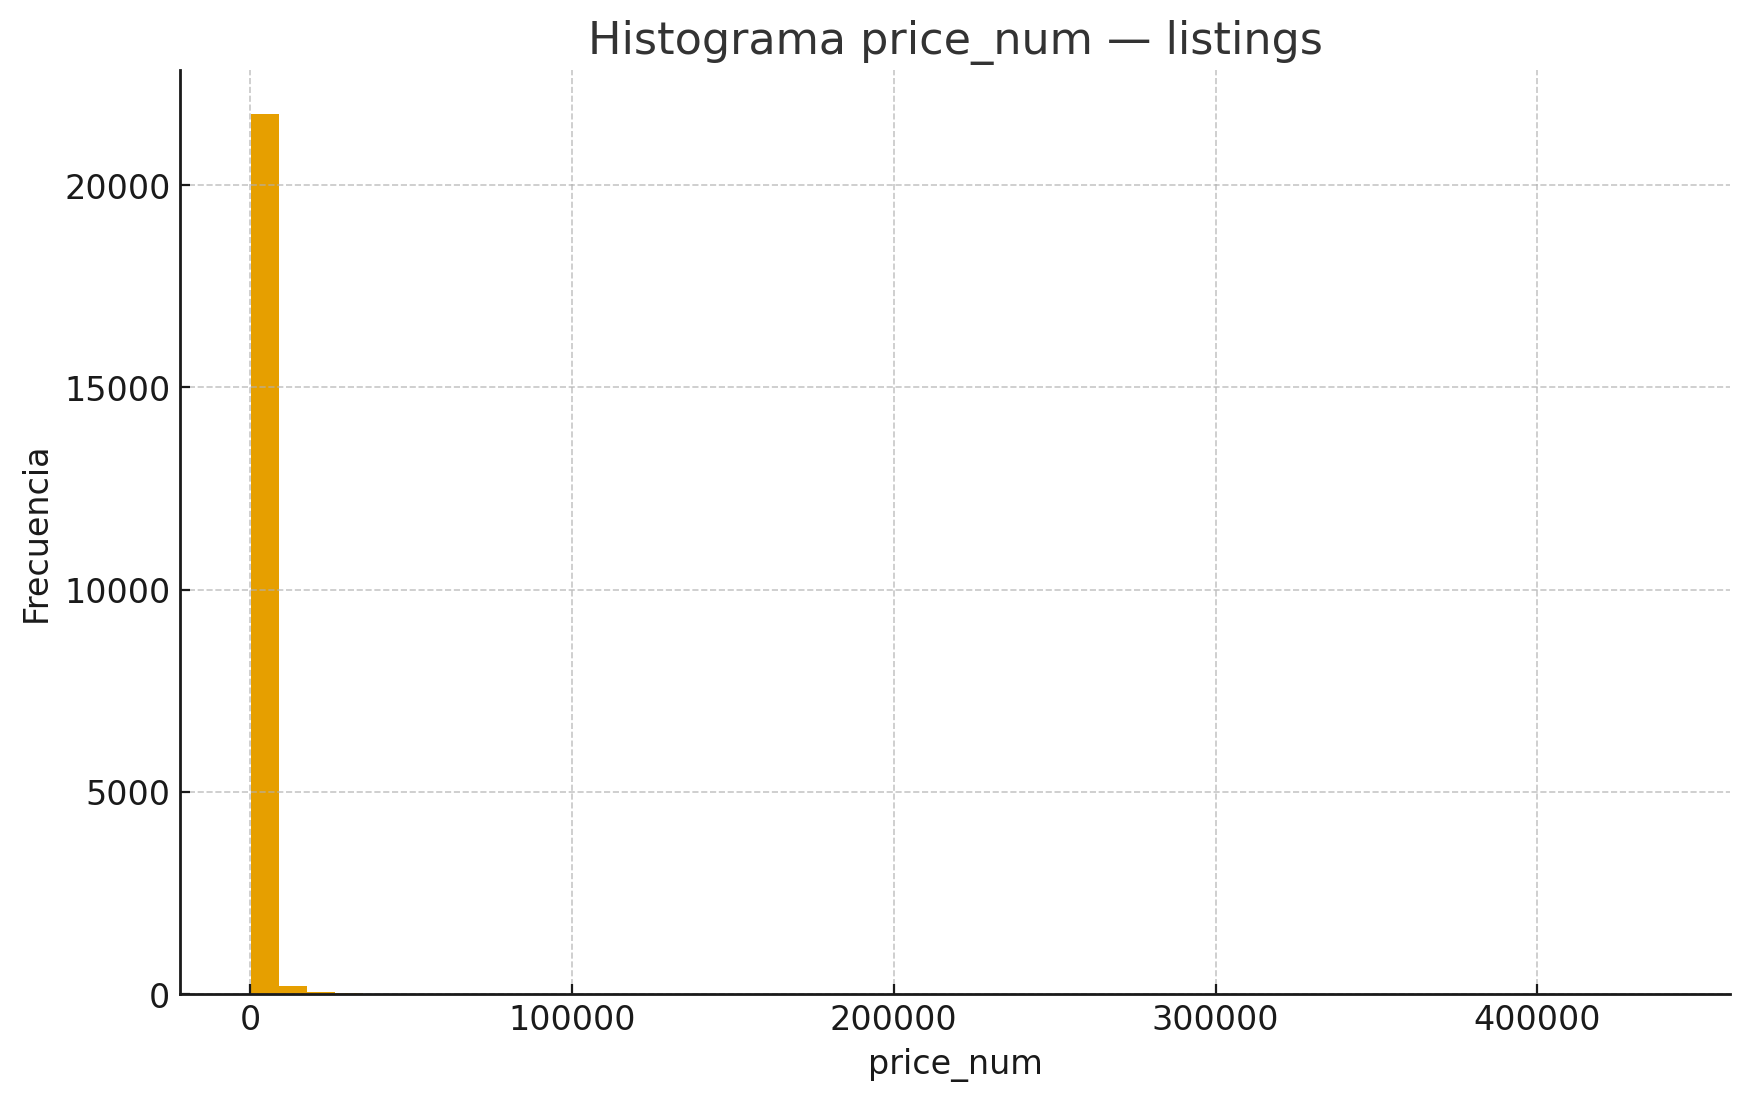

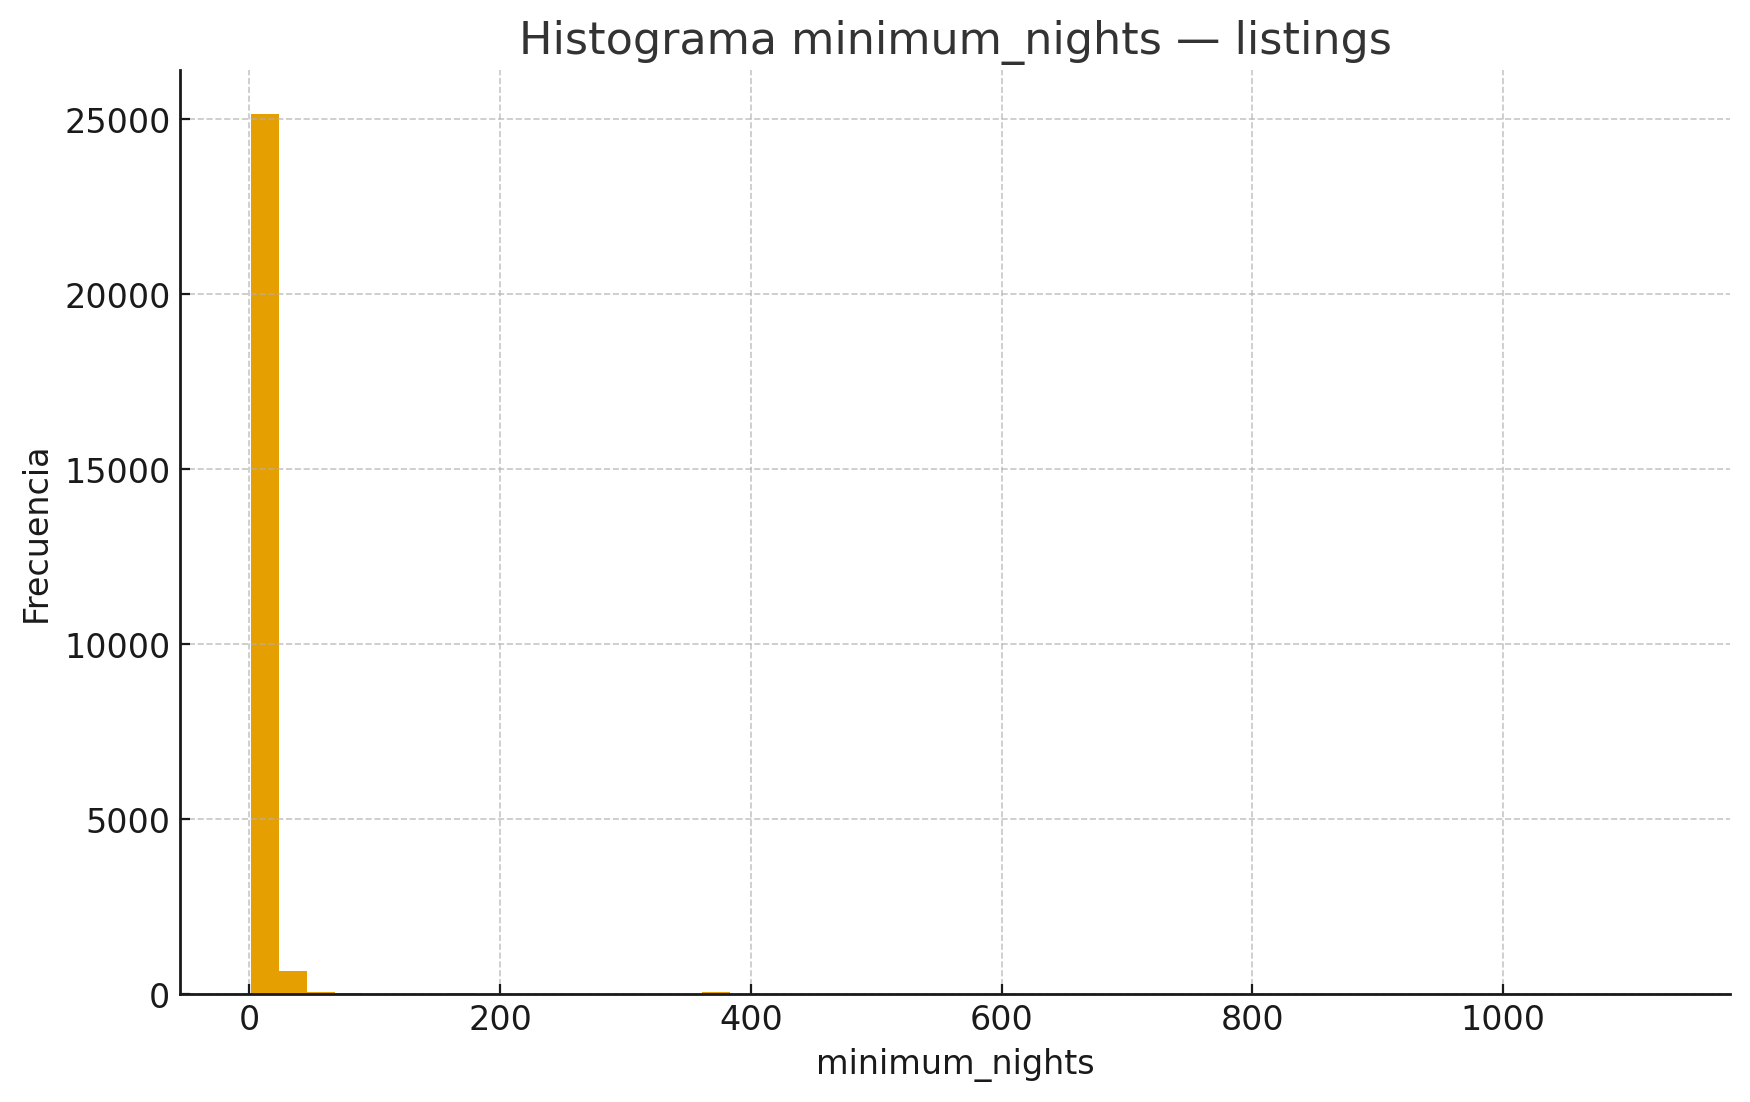

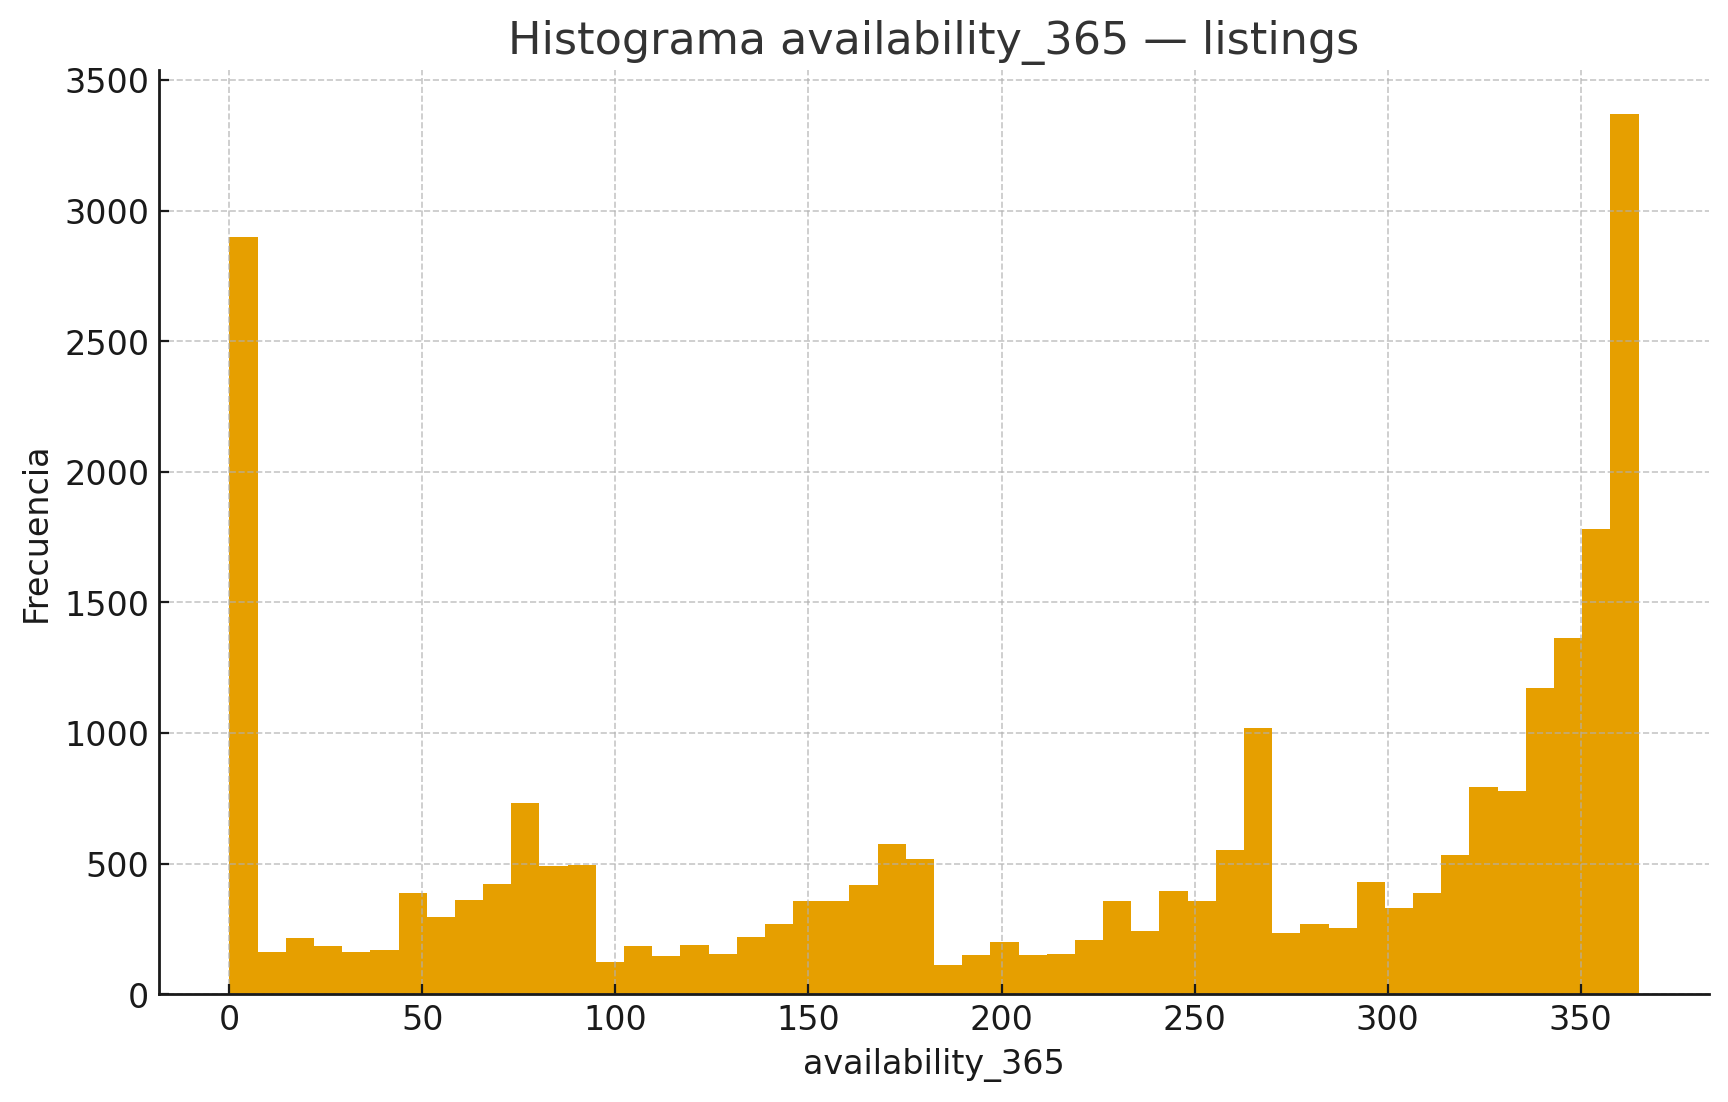

Sin datos para price_num


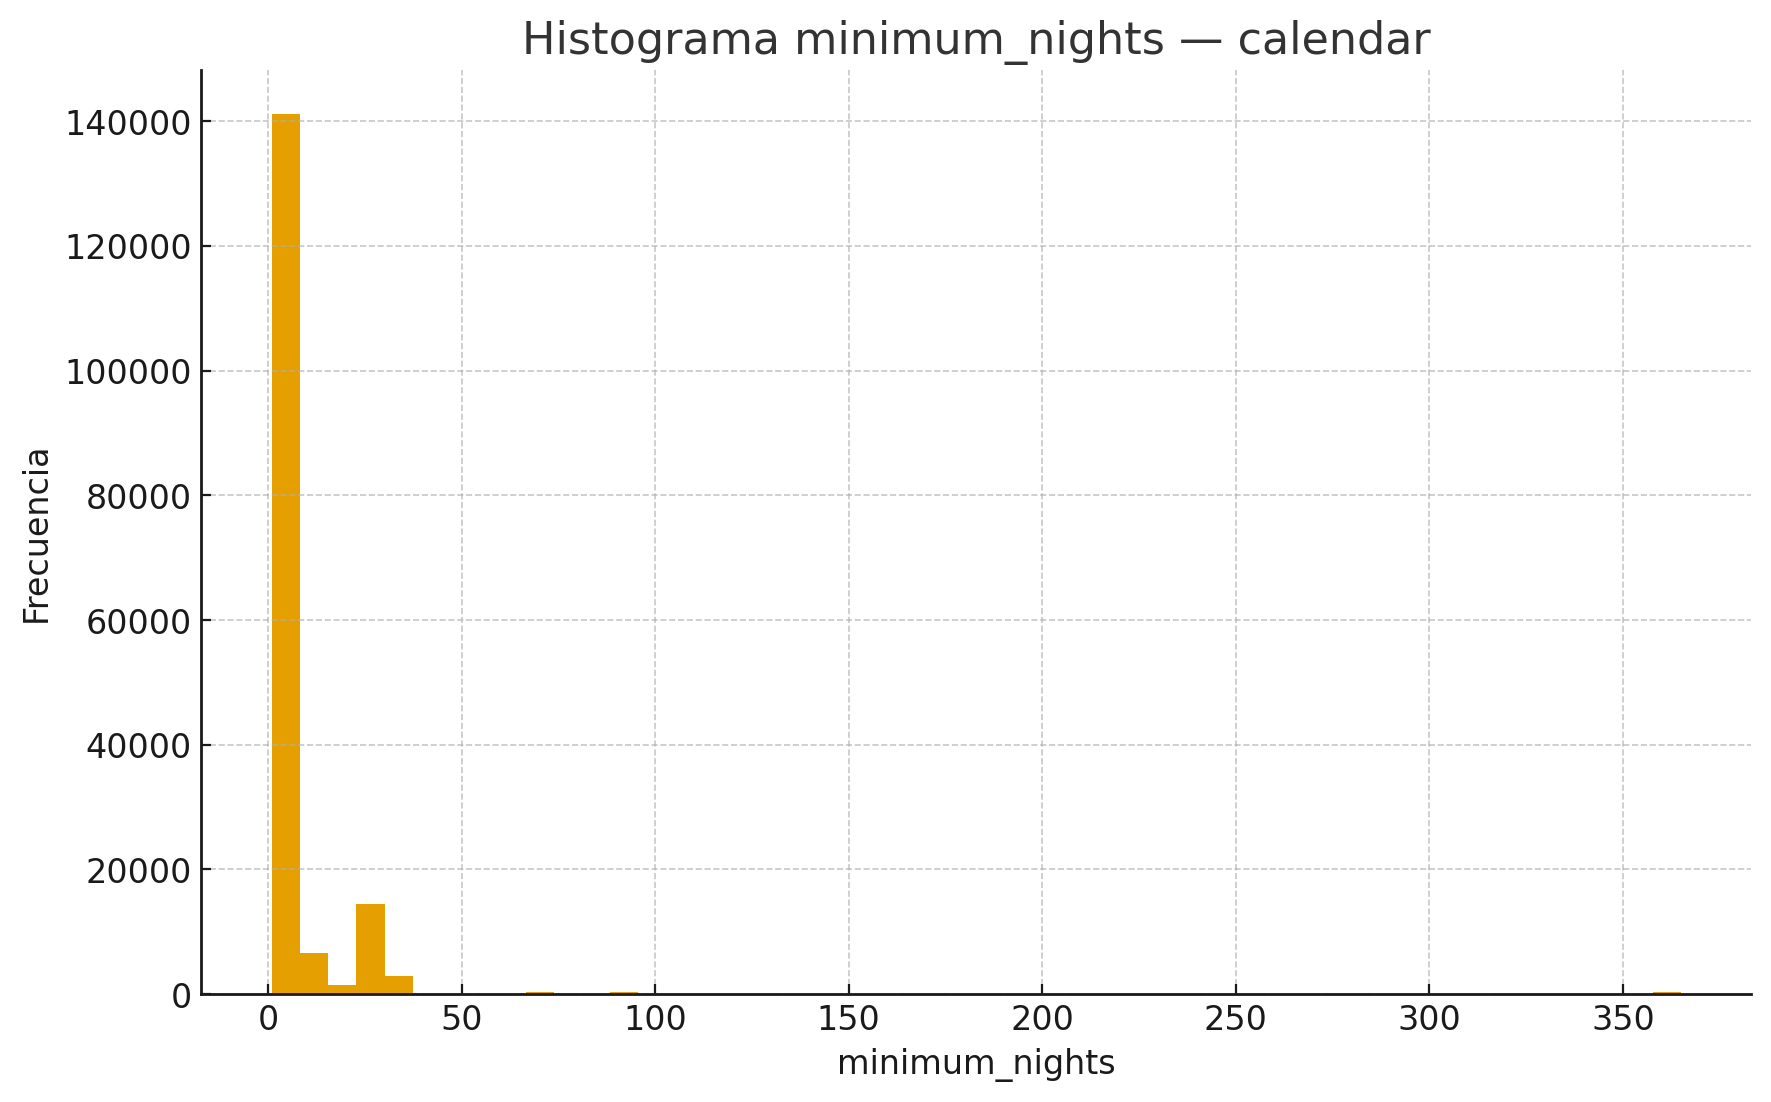

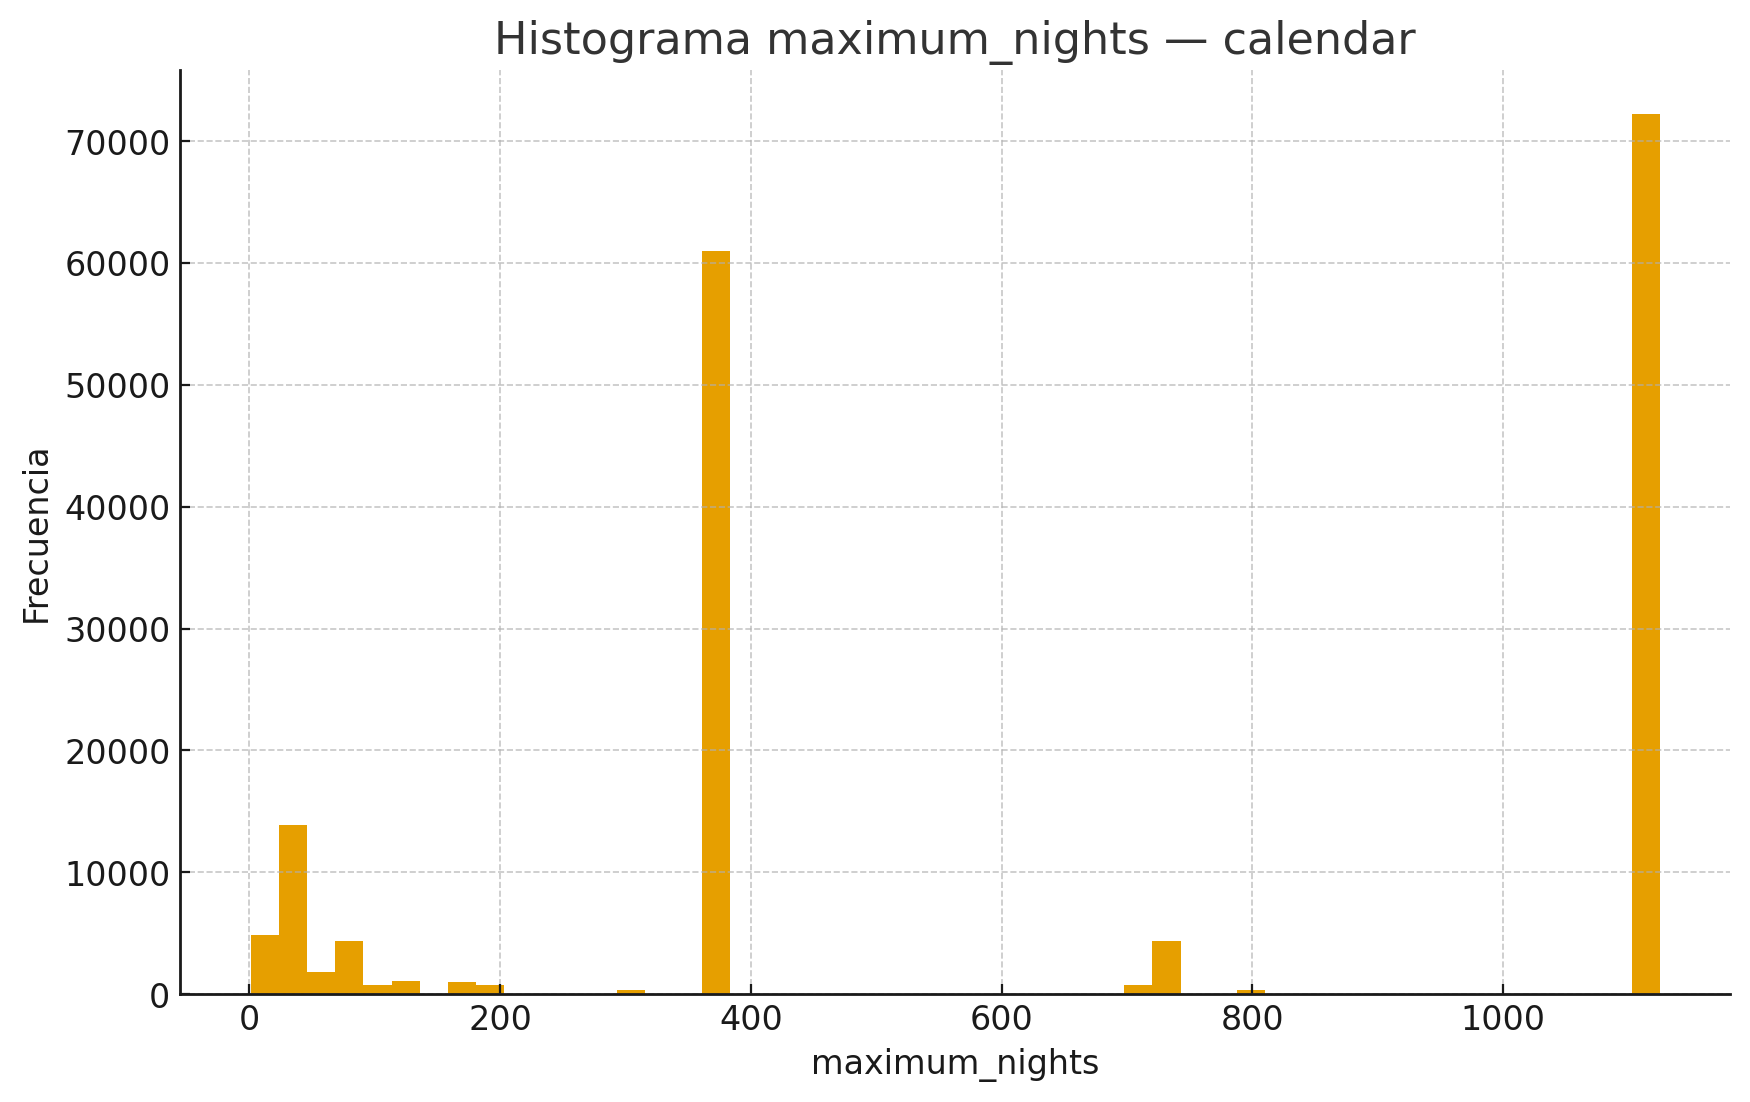

In [3]:
# Histogramas básicos (una variable por figura)
def plot_hist(df, col, bins=50, title=None):
    if col not in df.columns:
        print(f'Columna {col} no existe')
        return
    s = df[col].dropna()
    if s.empty:
        print(f'Sin datos para {col}')
        return
    plt.figure()
    plt.hist(s, bins=bins)
    plt.title(title or col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

for c in ['price_num','minimum_nights','availability_365']:
    if c in listings.columns:
        plot_hist(listings, c, bins=50, title=f'Histograma {c} — listings')

for c in ['price_num','minimum_nights','maximum_nights']:
    if c in calendar.columns:
        plot_hist(calendar, c, bins=50, title=f'Histograma {c} — calendar')


## 2.3 Transformaciones potenciales (sin aplicar todavía)

In [4]:
# Amenidades: convertir de str a lista y contar cuántas por listing (si existe)
if 'amenities' in listings.columns:
    def parse_amenities(x):
        if pd.isna(x): return []
        s = str(x)
        # La mayoría vienen como lista estilo Python: ['Wifi','TV'] o como string separado por comas
        try:
            if s.strip().startswith('[') and s.strip().endswith(']'):
                # Intento literal_eval seguro
                import ast
                v = ast.literal_eval(s)
                if isinstance(v, list):
                    return [str(i).strip().strip('"\'') for i in v]
        except Exception:
            pass
        # fallback: split por coma
        return [i.strip().strip('"\'') for i in s.split(',') if i.strip()]

    listings['amenities_list'] = listings['amenities'].apply(parse_amenities)
    listings['amenities_count'] = listings['amenities_list'].apply(len)
    display(listings[['id','amenities_count']].head())

# Fechas: detectar columnas con fecha y parsear ejemplo (demostración)
date_cols = [c for c in ['last_scraped','host_since','first_review','last_review','date'] if c in set(listings.columns) | set(reviews.columns) | set(calendar.columns)]
print('Columnas potenciales de fecha:', date_cols)

# Estandarización de una muestra: calendar['date'] y listings['last_scraped'] si existen
if 'date' in calendar.columns:
    calendar['_date_parsed'] = pd.to_datetime(calendar['date'], errors='coerce')
if 'last_scraped' in listings.columns:
    listings['_last_scraped_parsed'] = pd.to_datetime(listings['last_scraped'], errors='coerce')

# Ejemplo de agregación por mes en calendar (disponibilidad promedio por mes)
if set(['listing_id','date']).issubset(calendar.columns):
    cal_tmp = calendar.copy()
    cal_tmp['_date'] = pd.to_datetime(cal_tmp['date'], errors='coerce')
    cal_tmp['yyyy_mm'] = cal_tmp['_date'].dt.to_period('M').astype(str)
    if 'available' in cal_tmp.columns:
        # map available {t/f,y/n,true/false} -> 1/0 aproximado
        avail_map = {'t':1,'true':1,'y':1,'f':0,'false':0,'n':0}
        cal_tmp['_avail_num'] = cal_tmp['available'].astype(str).str.lower().map(avail_map)
        cal_month = cal_tmp.groupby(['listing_id','yyyy_mm'])['_avail_num'].mean().reset_index(name='availability_rate')
        display(cal_month.head())

# Estandarizar texto: ejemplo normalizar barrio/vecindario si existe
for c in ['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']:
    if c in listings.columns:
        listings[c+'_norm'] = listings[c].astype(str).str.strip().str.title()

print('Sugerencias de transformación listadas. La aplicación formal va en la etapa 3.')


,id,amenities_count
0,35797,12
1,44616,26
2,56074,28
3,67703,21
4,70644,50


Columnas potenciales de fecha: ['last_scraped', 'host_since', 'first_review', 'last_review', 'date']


,listing_id,yyyy_mm,availability_rate
0,2992450,2025-08,0.0
1,2992450,2025-09,0.0
2,2992450,2025-10,0.0
3,2992450,2025-11,0.0
4,2992450,2025-12,0.0


Sugerencias de transformación listadas. La aplicación formal va en la etapa 3.


## 2.4 Documentación de hallazgos
En esta sección, al ejecutar el cuaderno, documenta en texto (Markdown) tus principales conclusiones: nulos significativos, columnas ruidosas, correlaciones visuales, outliers, etc. Se incluyen celdas de apoyo a continuación para escribir el resumen.


## 2.4 Documentación de hallazgos (EDA)

### 1) Calidad y consistencia de los datos
**Nulos más relevantes (Top 12):**
- **listings** (26,067 × 82):  
neighbourhood_group_cleansed    26067
license                         26067
calendar_updated                26067
host_neighbourhood              12192
neighbourhood                   11676
neighborhood_overview           11676
host_about                      10456
host_location                    5480
beds                             4022
bathrooms                        4005
price                            3999
estimated_revenue_l365d          3999

- **reviews** (26,918 × 6):  
comments         8
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0

- **calendar** (167,535 × 9):  
price                 167535
adjusted_price        167535
price_num             167535
adjusted_price_num    167535
listing_id                 0
date                       0
available                  0
minimum_nights             0
maximum_nights             0

**Observaciones:**
- En **calendar**, `price` y `adjusted_price` llegan completamente vacíos en este corte, por lo que **no es posible** usar precios diarios desde este dataset; se debe confiar en `listings.price` (tras convertir a numérico) o re-extraer un calendario con precios poblados.
- En **listings**, hay campos descriptivos con alta ausencia (p. ej. `neighborhood_overview`, `host_about`, `bathrooms_text` según este top).
- **reviews** presenta baja ausencia en general (los campos clave están poblados), útil para análisis de sentimiento/temática si se planifica.

**Duplicados:**
- Duplicados globales — listings: **0**; reviews: **0**; calendar: **0**.
- Duplicados por clave — `listings.id`: **0**; `reviews(listing_id, id)`: **0**; `calendar(listing_id, date)`: **0**.
> Recomendación: eliminar duplicados por clave en cada colección antes de modelar.

---

### 2) Distribuciones y valores atípicos (IQR)
**Criterio:** *IQR* con umbrales *[Q1−1.5·IQR, Q3+1.5·IQR]*.

- **listings**:
{
  "price_num": {
    "count": 1757,
    "lower": -1008.0,
    "upper": 3360.0
  },
  "minimum_nights": {
    "count": 3489,
    "lower": -0.5,
    "upper": 3.5
  },
  "availability_365": {
    "count": 0,
    "lower": -294.5,
    "upper": 725.5
  }
}

- **calendar**:
{
  "price_num": {
    "count": 0,
    "lower": NaN,
    "upper": NaN
  },
  "adjusted_price_num": {
    "count": 0,
    "lower": NaN,
    "upper": NaN
  },
  "minimum_nights": {
    "count": 26421,
    "lower": -3.5,
    "upper": 8.5
  },
  "maximum_nights": {
    "count": 0,
    "lower": -775.0,
    "upper": 2265.0
  }
}

**Lectura práctica:**
- `minimum_nights` muestra cola pesada (pocos anuncios con mínimos muy altos). Suele ser **política del anfitrión**; conviene *capar* a un percentil (p. ej. P99) para modelos sensibles a outliers.
- `availability_365` con atípicos altos puede indicar anuncios permanentemente disponibles (no necesariamente problema).
- Si `price_num` tuviera outliers extremos, se sugiere winsorización (*clipping* a P1–P99) o transformación logarítmica para modelos.

---

### 3) Correlaciones y señales de negocio (listings)
**Top correlaciones absolutas con `price_num` (entre variables disponibles):**
- bedrooms: 0.297
- bathrooms: 0.286
- accommodates: 0.28
- minimum_nights: 0.033
- number_of_reviews: 0.033

**`amenities_count` ↔ `price_num`:** correlación de **0.089** (positiva débil/moderada). Más amenidades tienden a asociarse con precios mayores.

> Interpretación: el precio se asocia con capacidad del alojamiento (`accommodates`), recámaras/baños y calidad percibida (`review_scores_rating`). Estas señales orientan *features* para pricing y segmentación.

---

### 4) Series y agregaciones de calendario
Ejemplo de **tasa media de disponibilidad por mes** (primeros 6 meses presentes):

- 2025-08: 0.504
- 2025-09: 0.685
- 2025-10: 0.737
- 2025-11: 0.731
- 2025-12: 0.749
- 2026-01: 0.742

> Uso: la agregación mensual (o semanal) de disponibilidad permite estudiar **estacionalidad** (meses con más/menos oferta efectiva).

---

### 5) Recomendaciones de transformación (para la fase 3)
- **Limpieza estructural:** quitar duplicados por clave; estandarizar `id`/`listing_id` a tipo entero/str consistente; asegurarse de codificación UTF-8.
- **Precios:** convertir `listings.price` a numérico (`$`, `,`), evaluar *winsorizar* y/o `log1p(price)` para modelado.
- **Fechas:** `to_datetime` en `last_scraped`, `host_since`, `first_review`, `last_review`, `calendar.date` y derivar `yyyy_mm`.
- **Texto/amenities:** desanidar `amenities` para **conteo** o **dummies** por amenidad estratégica (Wifi, A/C, Cocina, Estacionamiento). Normalizar `neighbourhood_*` (trim/title) para *joins* con capas geográficas.
- **Reglas de negocio:** capar `minimum_nights` (p. ej., P99), revisar `availability_365` extremos, y decidir si filtrar anuncios sin precio.
- **Calendario:** si se requiere *pricing* temporal, re-extraer calendario con `price/adjusted_price` poblados; de lo contrario, usar `listings.price` (nivel estático) y enriquecer con estacionalidad de disponibilidad.

---

### 6) Conclusiones ejecutivas
1. **Cobertura de precio diario**: el calendario no trae precios en este corte; para análisis temporal de ingresos, es necesario **re-extraer** o **enriquecer** con otra fuente.  
2. **Outliers presentes** en `minimum_nights` y potencialmente en `price`; se recomienda **cap** o **winsorización** para estabilidad de modelos.  
3. **Señales útiles para pricing**: capacidad del alojamiento, recámaras/baños y amenidades se asocian positivamente con el precio.  
4. **Calidad de datos aceptable** en `reviews` y `listings` (salvo campos descriptivos con nulos); aplicar limpieza y normalización de texto/fechas.  
5. **Agregación mensual** de disponibilidad lista para estudiar estacionalidad; ayudará en *forecasting* de ocupación y estrategia de precios.

> Con este 2.4, queda documentado el estado del dataset y las decisiones de transformación prioritarias para la fase de **Transformación**.


## 2.x Gráficas y análisis interpretativo

A continuación se incluyen visualizaciones clave para el EDA, junto con breves interpretaciones.  
> Nota: Las figuras usan **matplotlib** (una por gráfico) y no se fijan colores manualmente.


In [5]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, ast
base_path = '/mnt/data'
listings = pd.read_csv(f'{base_path}/listings.csv', low_memory=False)
reviews  = pd.read_csv(f'{base_path}/reviews.csv',  low_memory=False)
calendar = pd.read_csv(f'{base_path}/calendar.csv', low_memory=False)

def to_numeric_price(s):
    if s is None: return np.nan
    if isinstance(s, (int, float)): return s
    return pd.to_numeric(str(s).replace('$','').replace(',','').strip(), errors='coerce')

if 'price' in listings.columns:
    listings['price_num'] = listings['price'].apply(to_numeric_price)
if 'price' in calendar.columns:
    calendar['price_num'] = calendar['price'].apply(to_numeric_price)
if 'adjusted_price' in calendar.columns:
    calendar['adjusted_price_num'] = calendar['adjusted_price'].apply(to_numeric_price)

# amenities_count (si existe)
if 'amenities' in listings.columns and 'amenities_count' not in listings.columns:
    def parse_amenities(x):
        if pd.isna(x):
            return []
        s = str(x).strip()
        # Intento parsear como lista literal de Python, en caso de venir como "['Wifi', 'TV']"
        try:
            if s.startswith('[') and s.endswith(']'):
                v = ast.literal_eval(s)
                if isinstance(v, list):
                    out = []
                    for i in v:
                        item = str(i).strip().strip('"').strip("'")
                        if item:
                            out.append(item)
                    return out
        except Exception:
            pass
        # Fallback: dividir por comas
        return [itm.strip().strip('"').strip("'") for itm in s.split(',') if itm.strip()]
    listings['amenities_list'] = listings['amenities'].apply(parse_amenities)
    listings['amenities_count'] = listings['amenities_list'].apply(len)


### Distribuciones básicas (histogramas)
**Objetivo:** ver sesgos, colas y rangos de valores típicos.

Se grafican:
- `listings.price_num` (si está disponible)
- `listings.minimum_nights`
- `listings.availability_365`


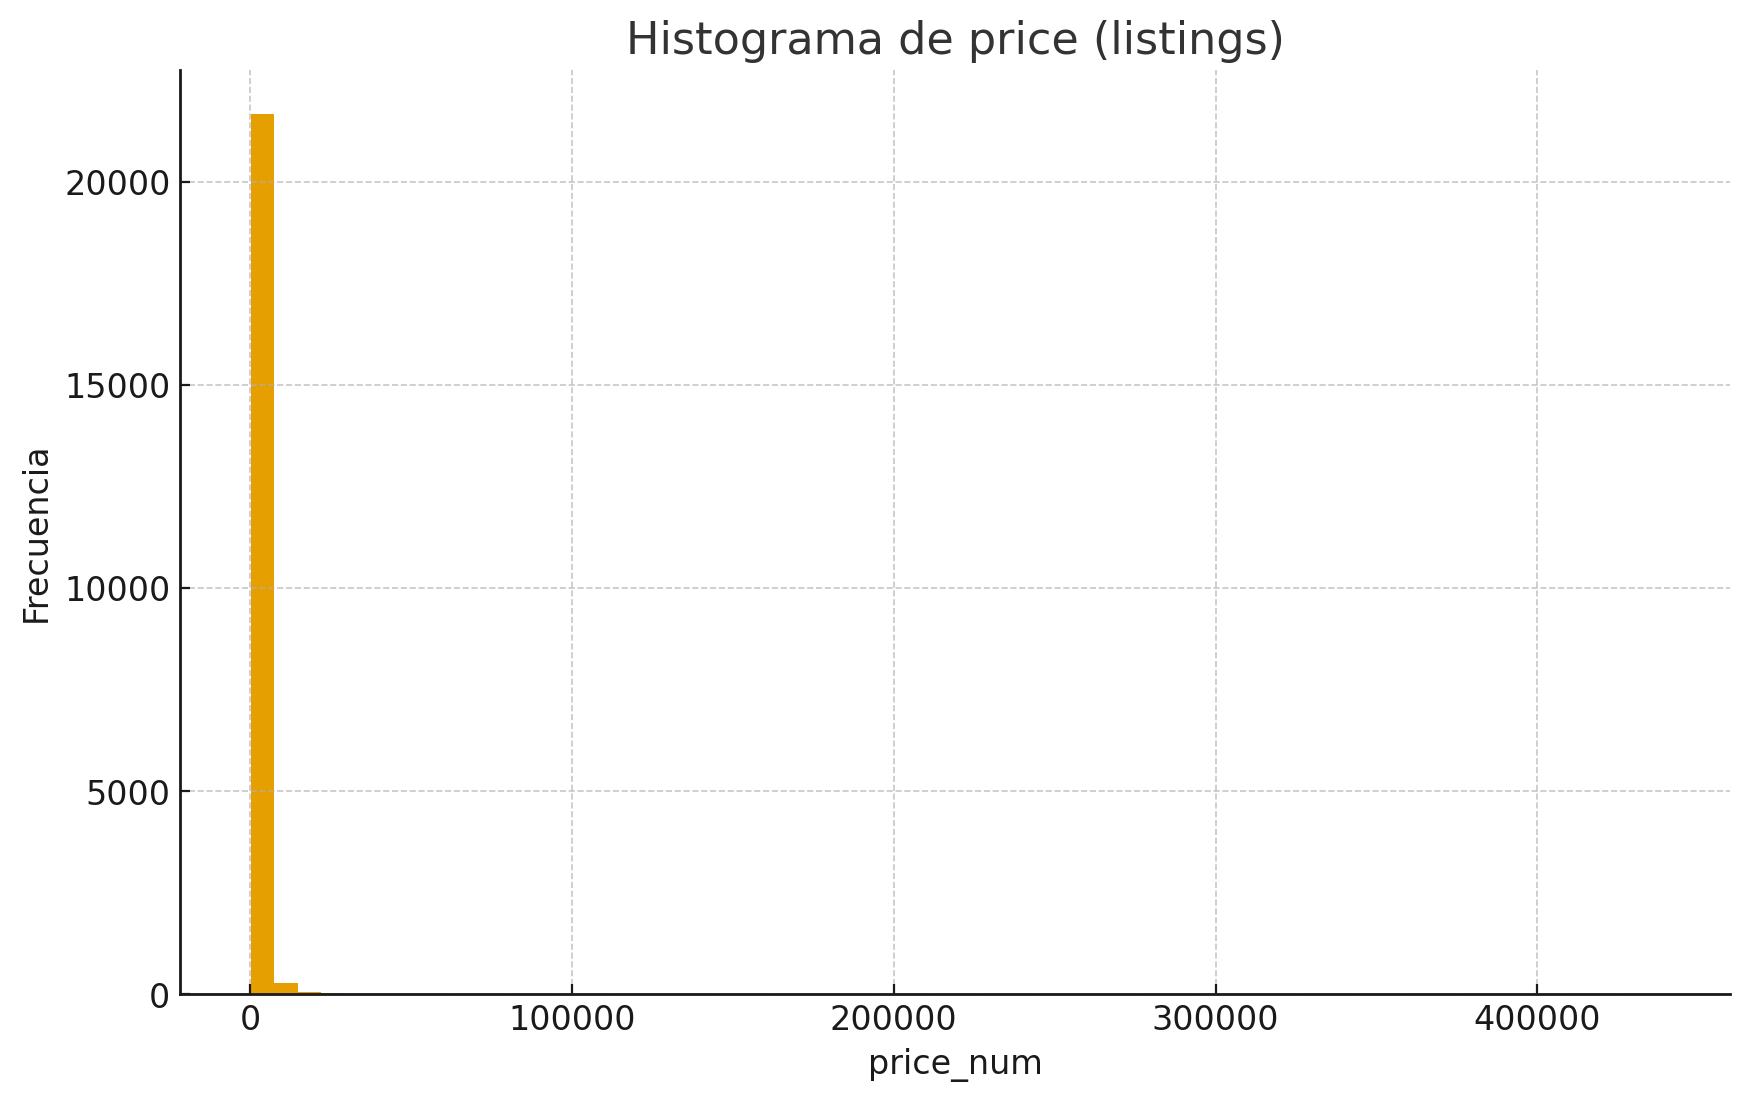

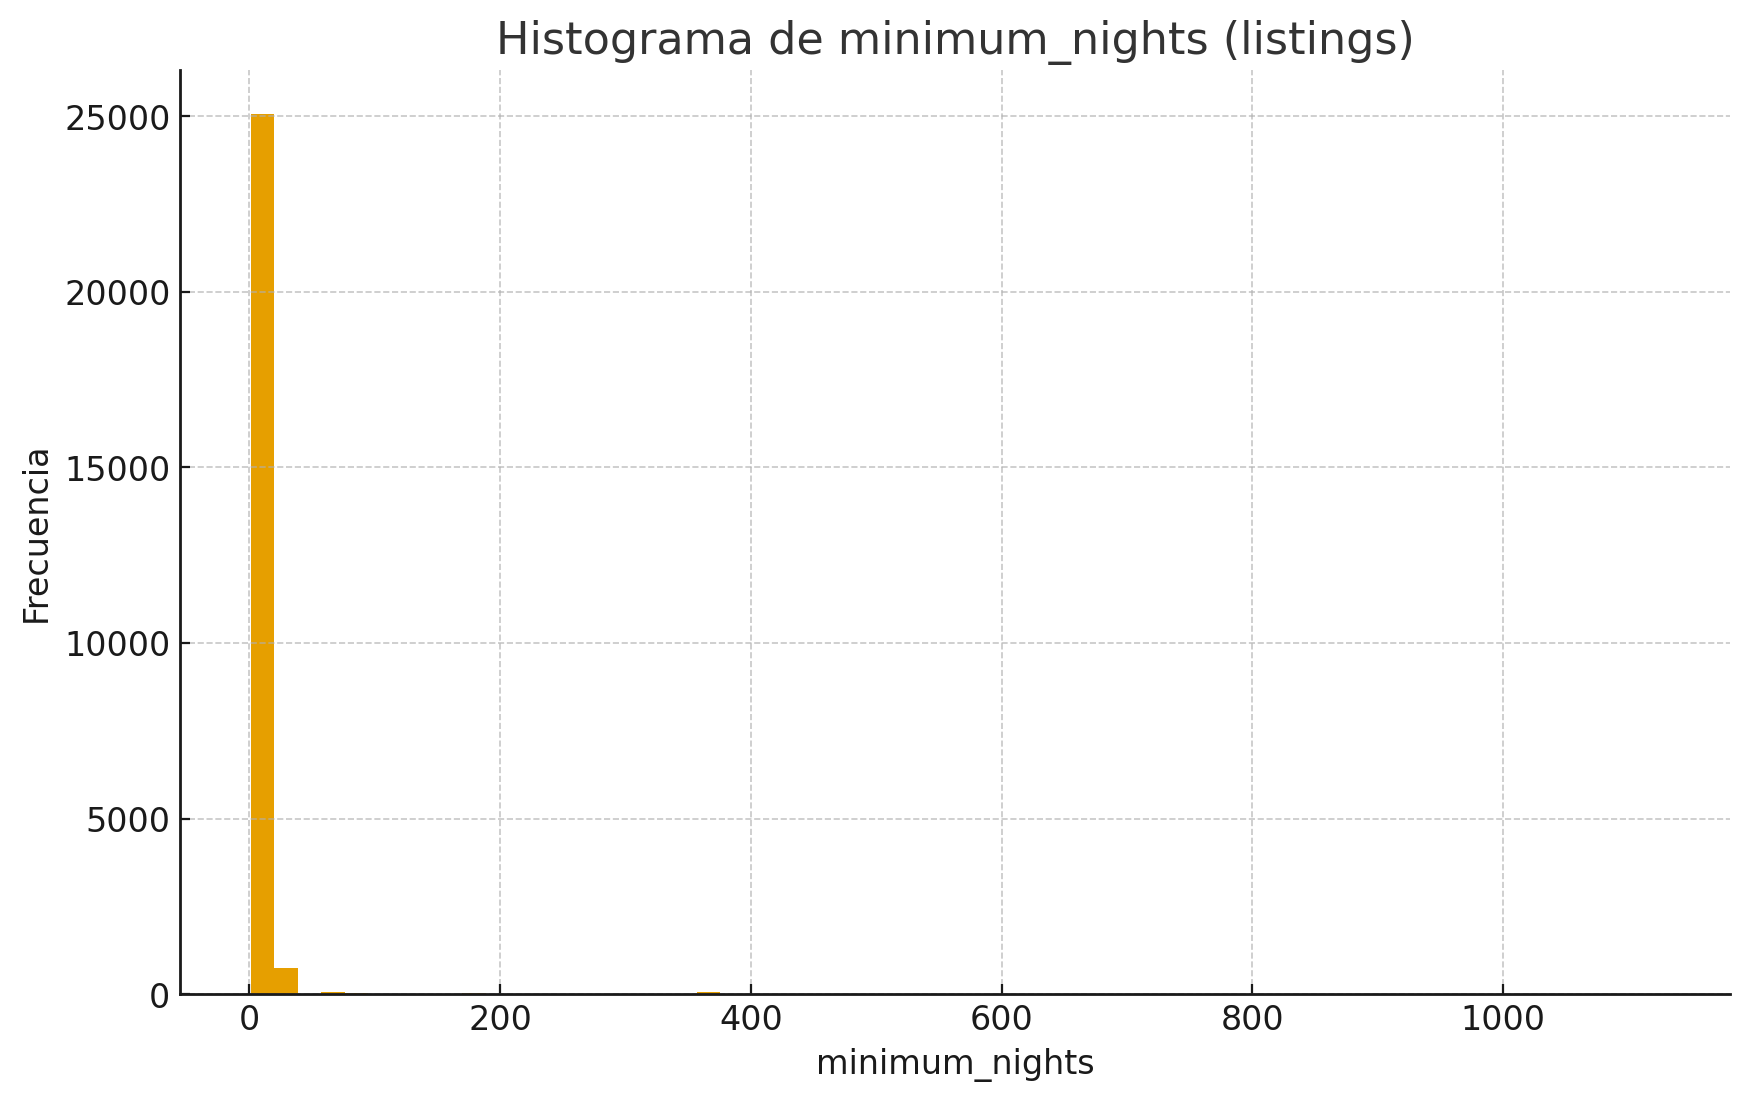

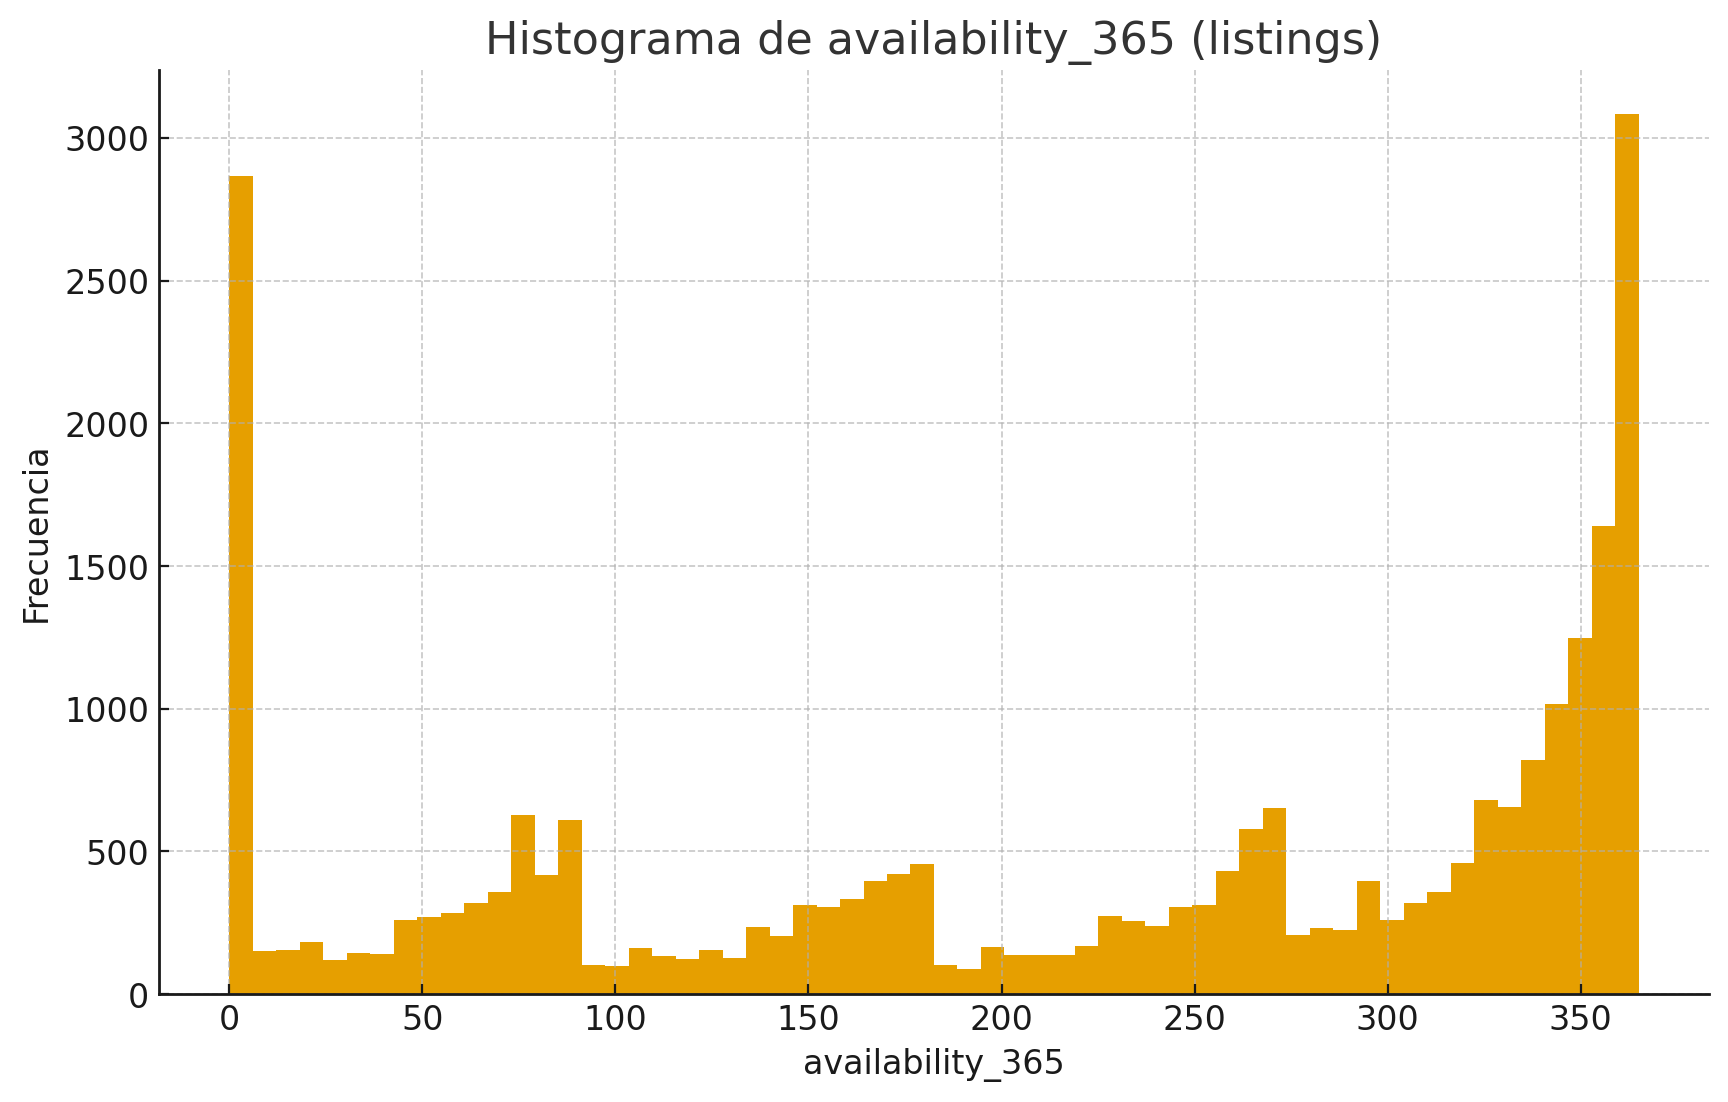

In [6]:
def hist_series(df, col, bins=60, title=None):
    if col not in df.columns: 
        print(f'No existe {col}'); 
        return
    s = pd.to_numeric(df[col], errors='coerce').dropna()
    if s.empty:
        print(f'Sin datos para {col}'); 
        return
    plt.figure()
    plt.hist(s, bins=bins)
    plt.title(title or col)
    plt.xlabel(col); plt.ylabel('Frecuencia')
    plt.show()

if 'price_num' in listings.columns: hist_series(listings, 'price_num', title='Histograma de price (listings)')
if 'minimum_nights' in listings.columns: hist_series(listings, 'minimum_nights', title='Histograma de minimum_nights (listings)')
if 'availability_365' in listings.columns: hist_series(listings, 'availability_365', title='Histograma de availability_365 (listings)')


**Lectura rápida:**  
- `price`: típicamente sesgado a la derecha; unos pocos anuncios caros elevan la cola. Considerar **winsorización** o `log1p(price)` si vas a modelar.  
- `minimum_nights`: cola larga por reglas mínimas elevadas en pocos anuncios; **cap** en P99 ayuda a estabilizar análisis.  
- `availability_365`: picos cerca de 0 y/o 365 indican anuncios casi siempre ocupados o siempre disponibles.


### Relaciones precio–características (dispersión)
**Objetivo:** identificar señales de negocio para pricing.


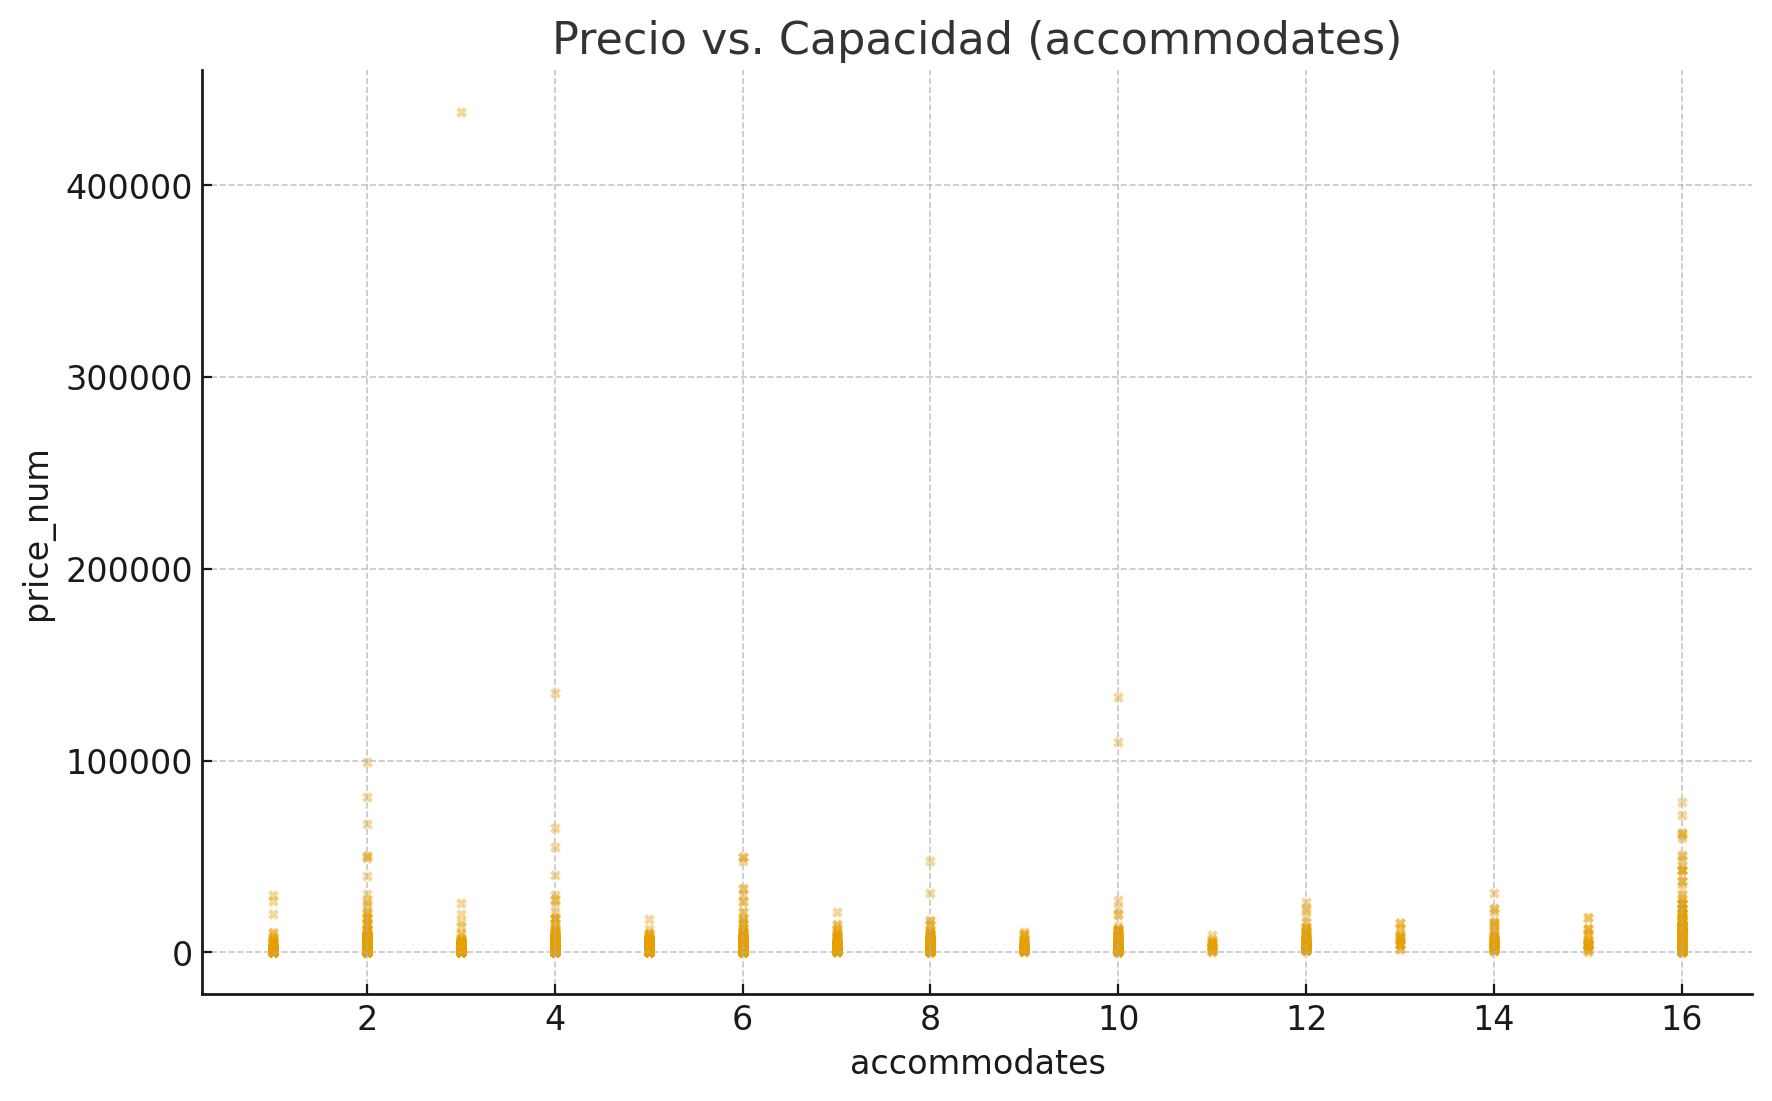

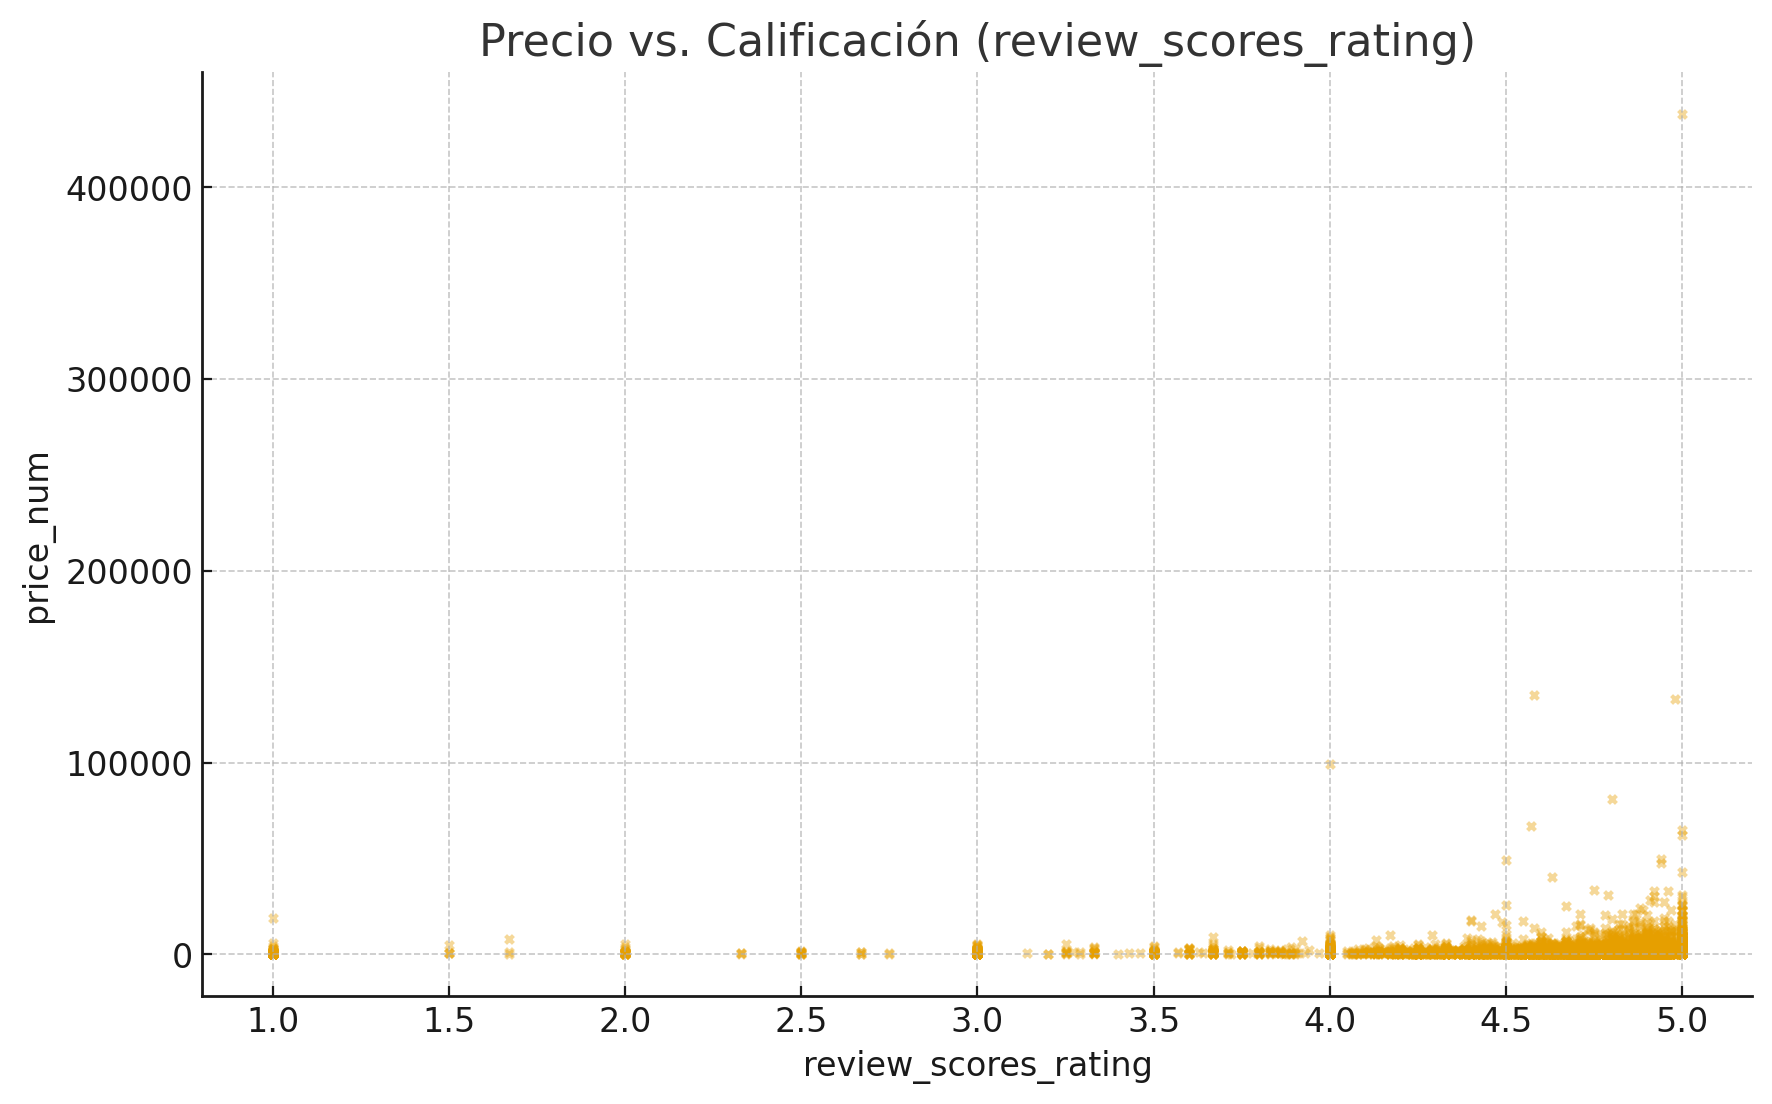

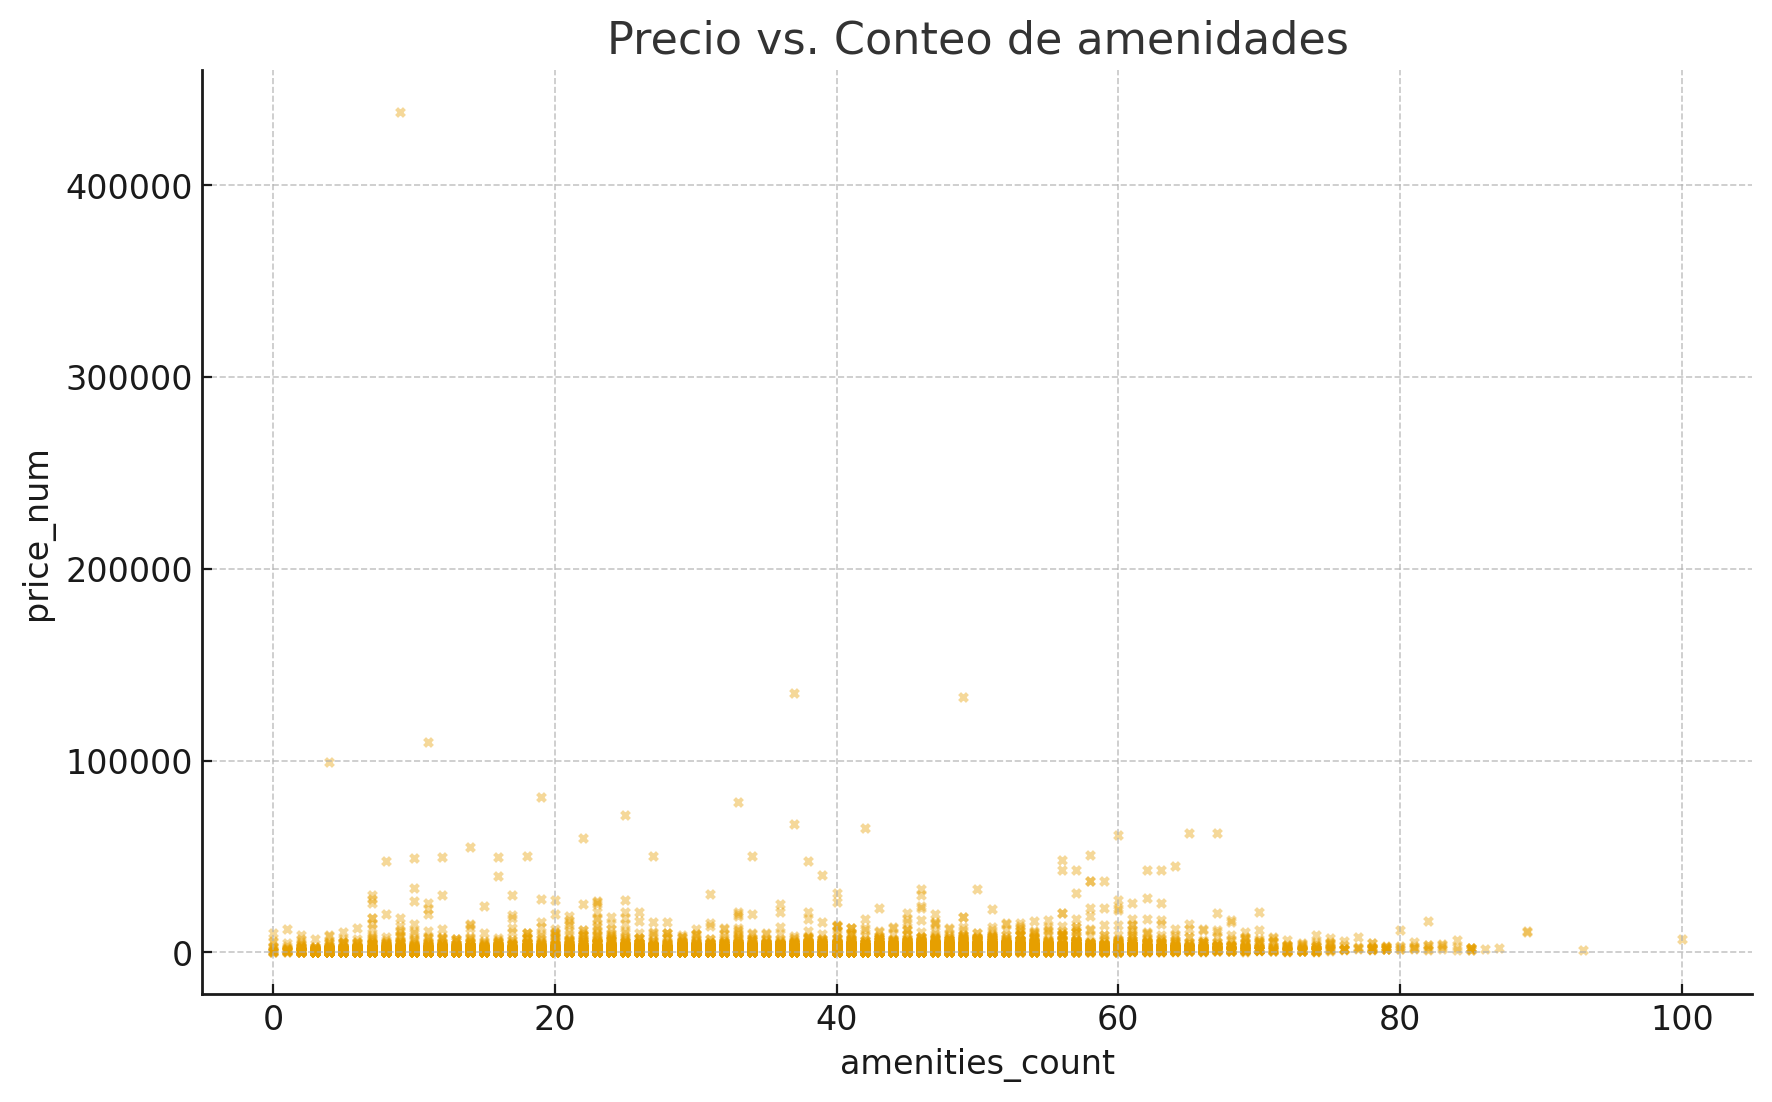

In [7]:
def scatter_xy(df, x, y, title=None):
    if x not in df.columns or y not in df.columns:
        print(f'Faltan columnas {x} o {y}'); 
        return
    X = pd.to_numeric(df[x], errors='coerce')
    Y = pd.to_numeric(df[y], errors='coerce')
    m = (~X.isna()) & (~Y.isna())
    if m.sum() == 0:
        print('Sin datos válidos para scatter'); 
        return
    plt.figure()
    plt.scatter(X[m], Y[m], s=8, alpha=0.4)
    plt.title(title or f'{y} vs {x}')
    plt.xlabel(x); plt.ylabel(y)
    plt.show()

if 'price_num' in listings.columns and 'accommodates' in listings.columns:
    scatter_xy(listings, 'accommodates', 'price_num', 'Precio vs. Capacidad (accommodates)')

if 'price_num' in listings.columns and 'review_scores_rating' in listings.columns:
    scatter_xy(listings, 'review_scores_rating', 'price_num', 'Precio vs. Calificación (review_scores_rating)')

if 'price_num' in listings.columns and 'amenities_count' in listings.columns:
    scatter_xy(listings, 'amenities_count', 'price_num', 'Precio vs. Conteo de amenidades')


**Lectura rápida:**  
- A mayor **capacidad** y **amenidades**, tiende a aumentar el **precio** (patrón ascendente disperso).  
- La relación con **rating** suele ser más débil (precio puede no subir linealmente con la calificación).  
> Estas evidencias apoyan usar `accommodates`, `bedrooms/bathrooms` y `amenities_count` como *features* en modelos de precio.


### Composición por vecindario (Top 15) y precio medio
**Objetivo:** ver concentración geográfica y diferencias de precio.


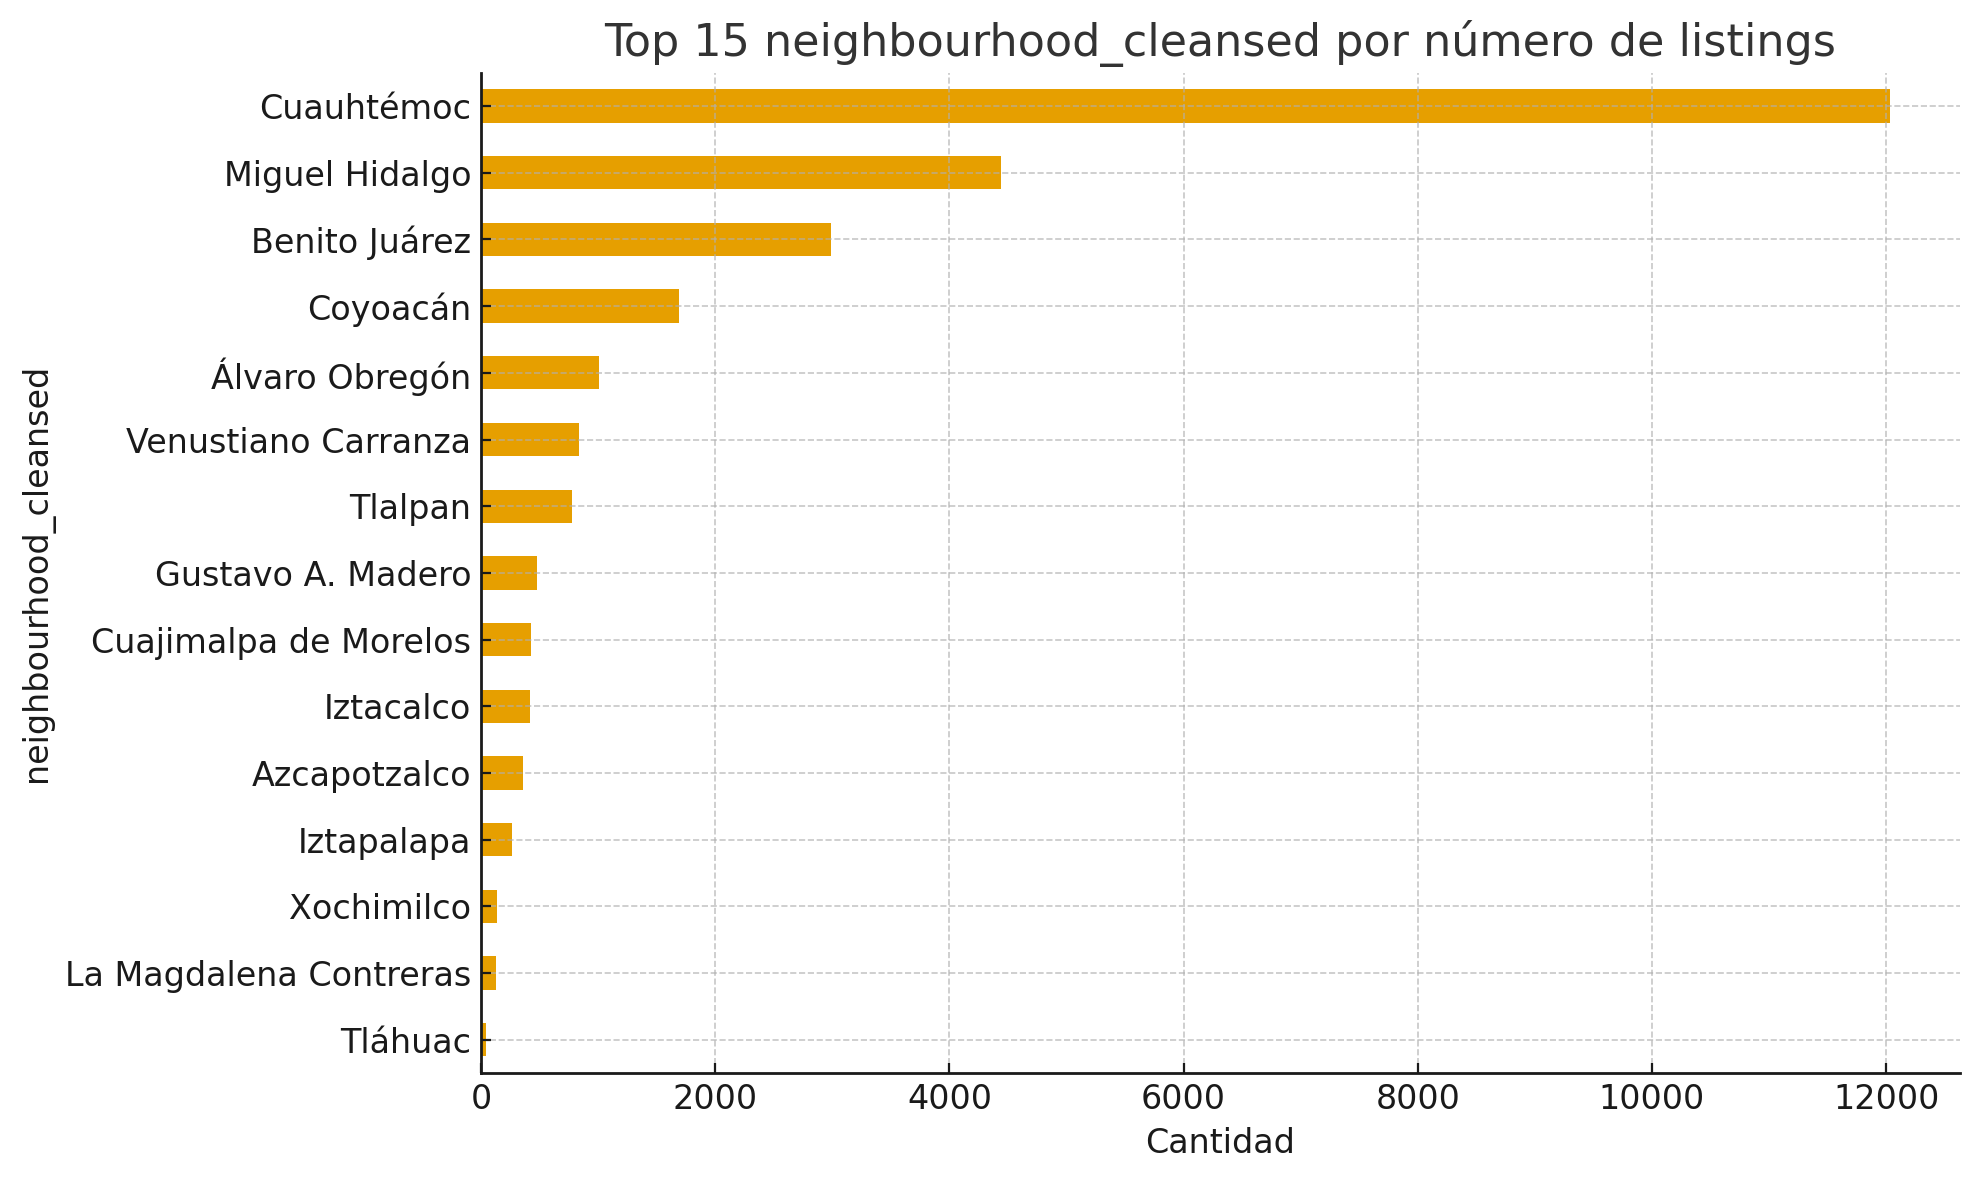

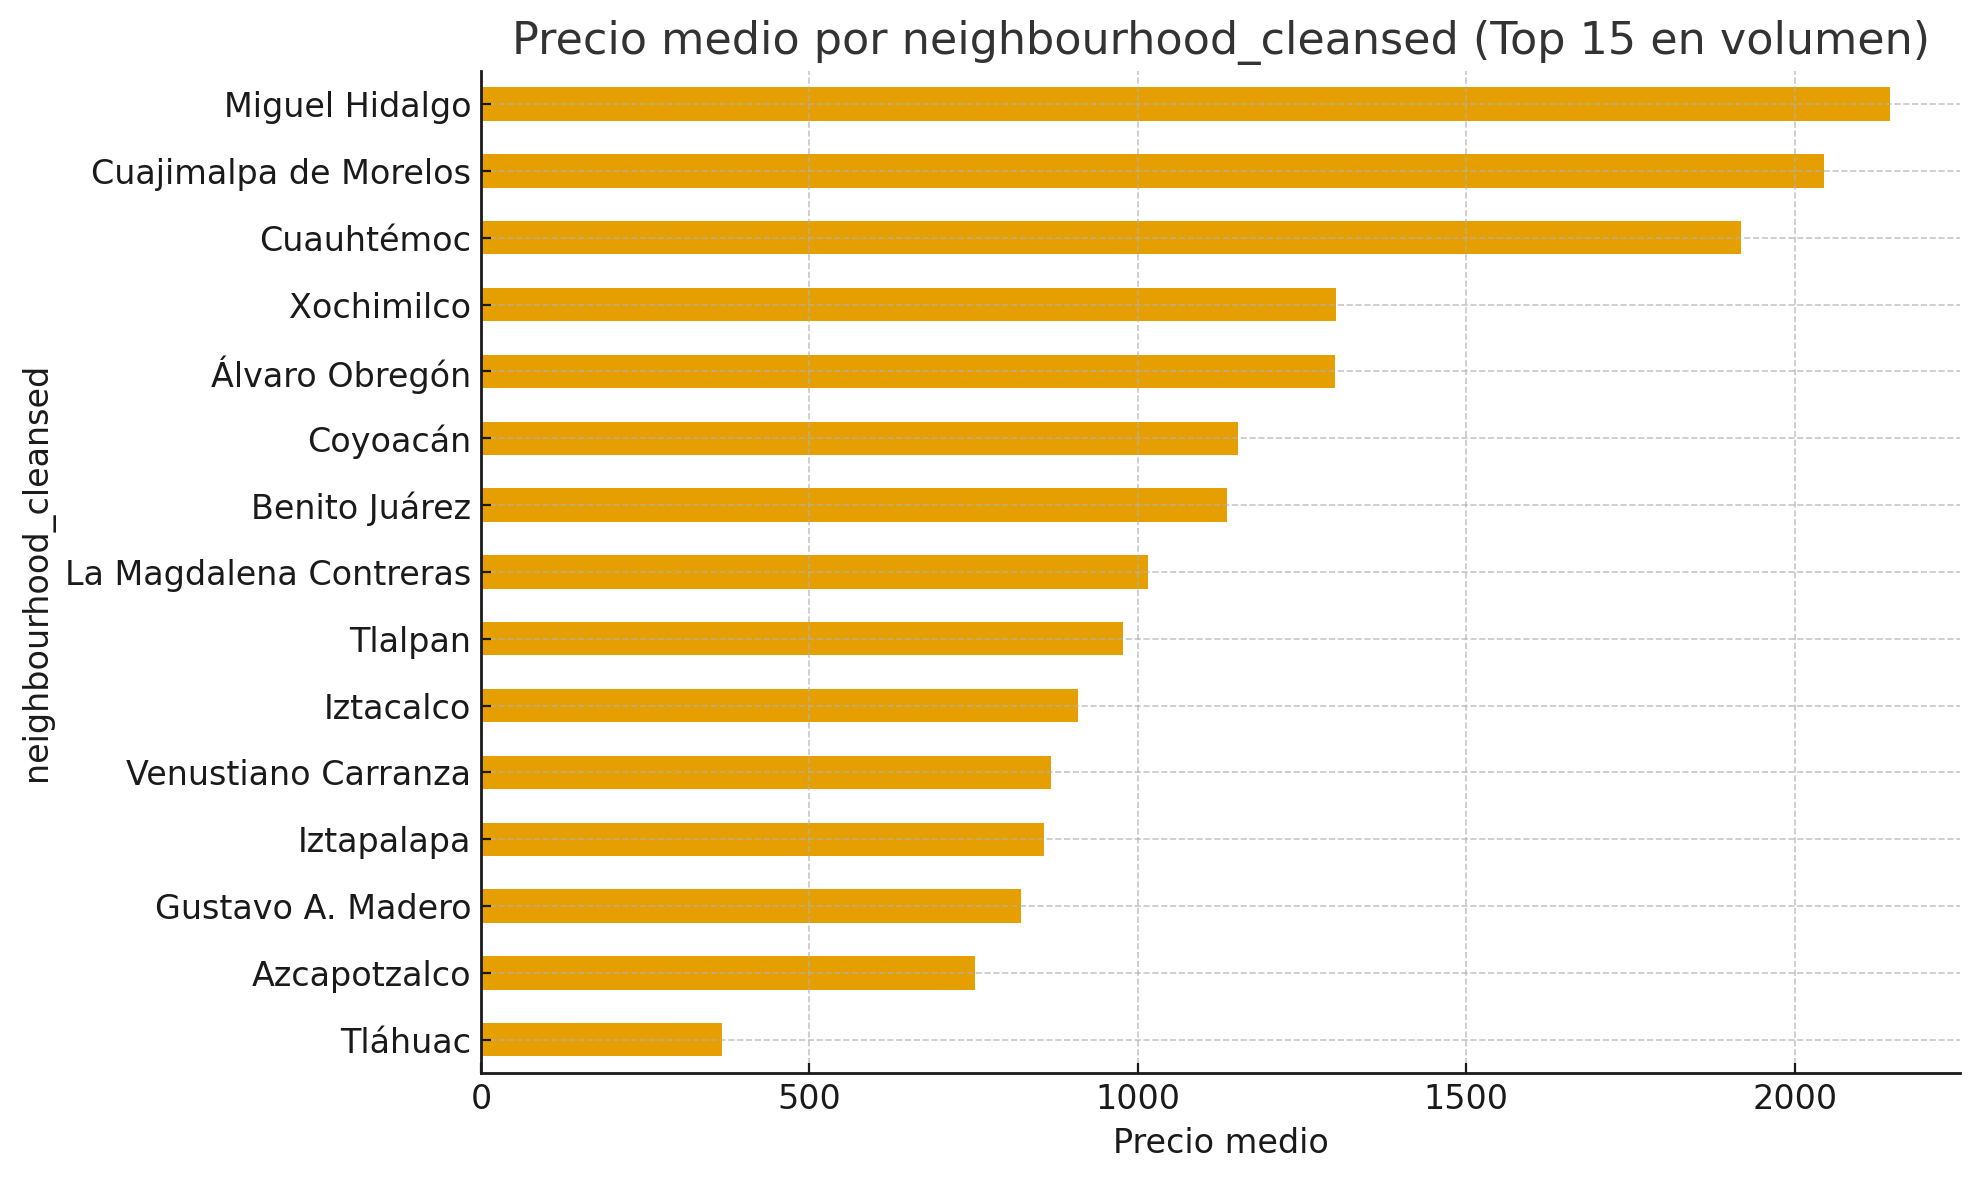

In [8]:
import numpy as np
nb_col = None
for c in ['neighbourhood_cleansed','neighbourhood','neighbourhood_group_cleansed']:
    if c in listings.columns: 
        nb_col = c; break

if nb_col is not None:
    counts = listings[nb_col].astype(str).value_counts().head(15)
    plt.figure()
    counts[::-1].plot(kind='barh')
    plt.title(f'Top 15 {nb_col} por número de listings')
    plt.xlabel('Cantidad'); plt.ylabel(nb_col)
    plt.tight_layout(); plt.show()

    if 'price_num' in listings.columns:
        top_names = counts.index.tolist()
        sub = listings[listings[nb_col].isin(top_names)].copy()
        grp = sub.groupby(nb_col)['price_num'].mean().sort_values().head(15)
        plt.figure()
        grp.plot(kind='barh')
        plt.title(f'Precio medio por {nb_col} (Top 15 en volumen)')
        plt.xlabel('Precio medio'); plt.ylabel(nb_col)
        plt.tight_layout(); plt.show()
else:
    print('No se encontró una columna de vecindario para agrupar.')


**Lectura rápida:**  
- Unos pocos barrios concentran gran parte de la oferta.  
- El **precio medio** no siempre sigue el volumen: zonas premium pueden tener menos anuncios pero precios medios más altos.  
> Útil para segmentar por **zona** y diseñar estrategias de precio/localización.


### Estacionalidad (disponibilidad mensual)
**Objetivo:** aproximar estacionalidad con `calendar.available`.


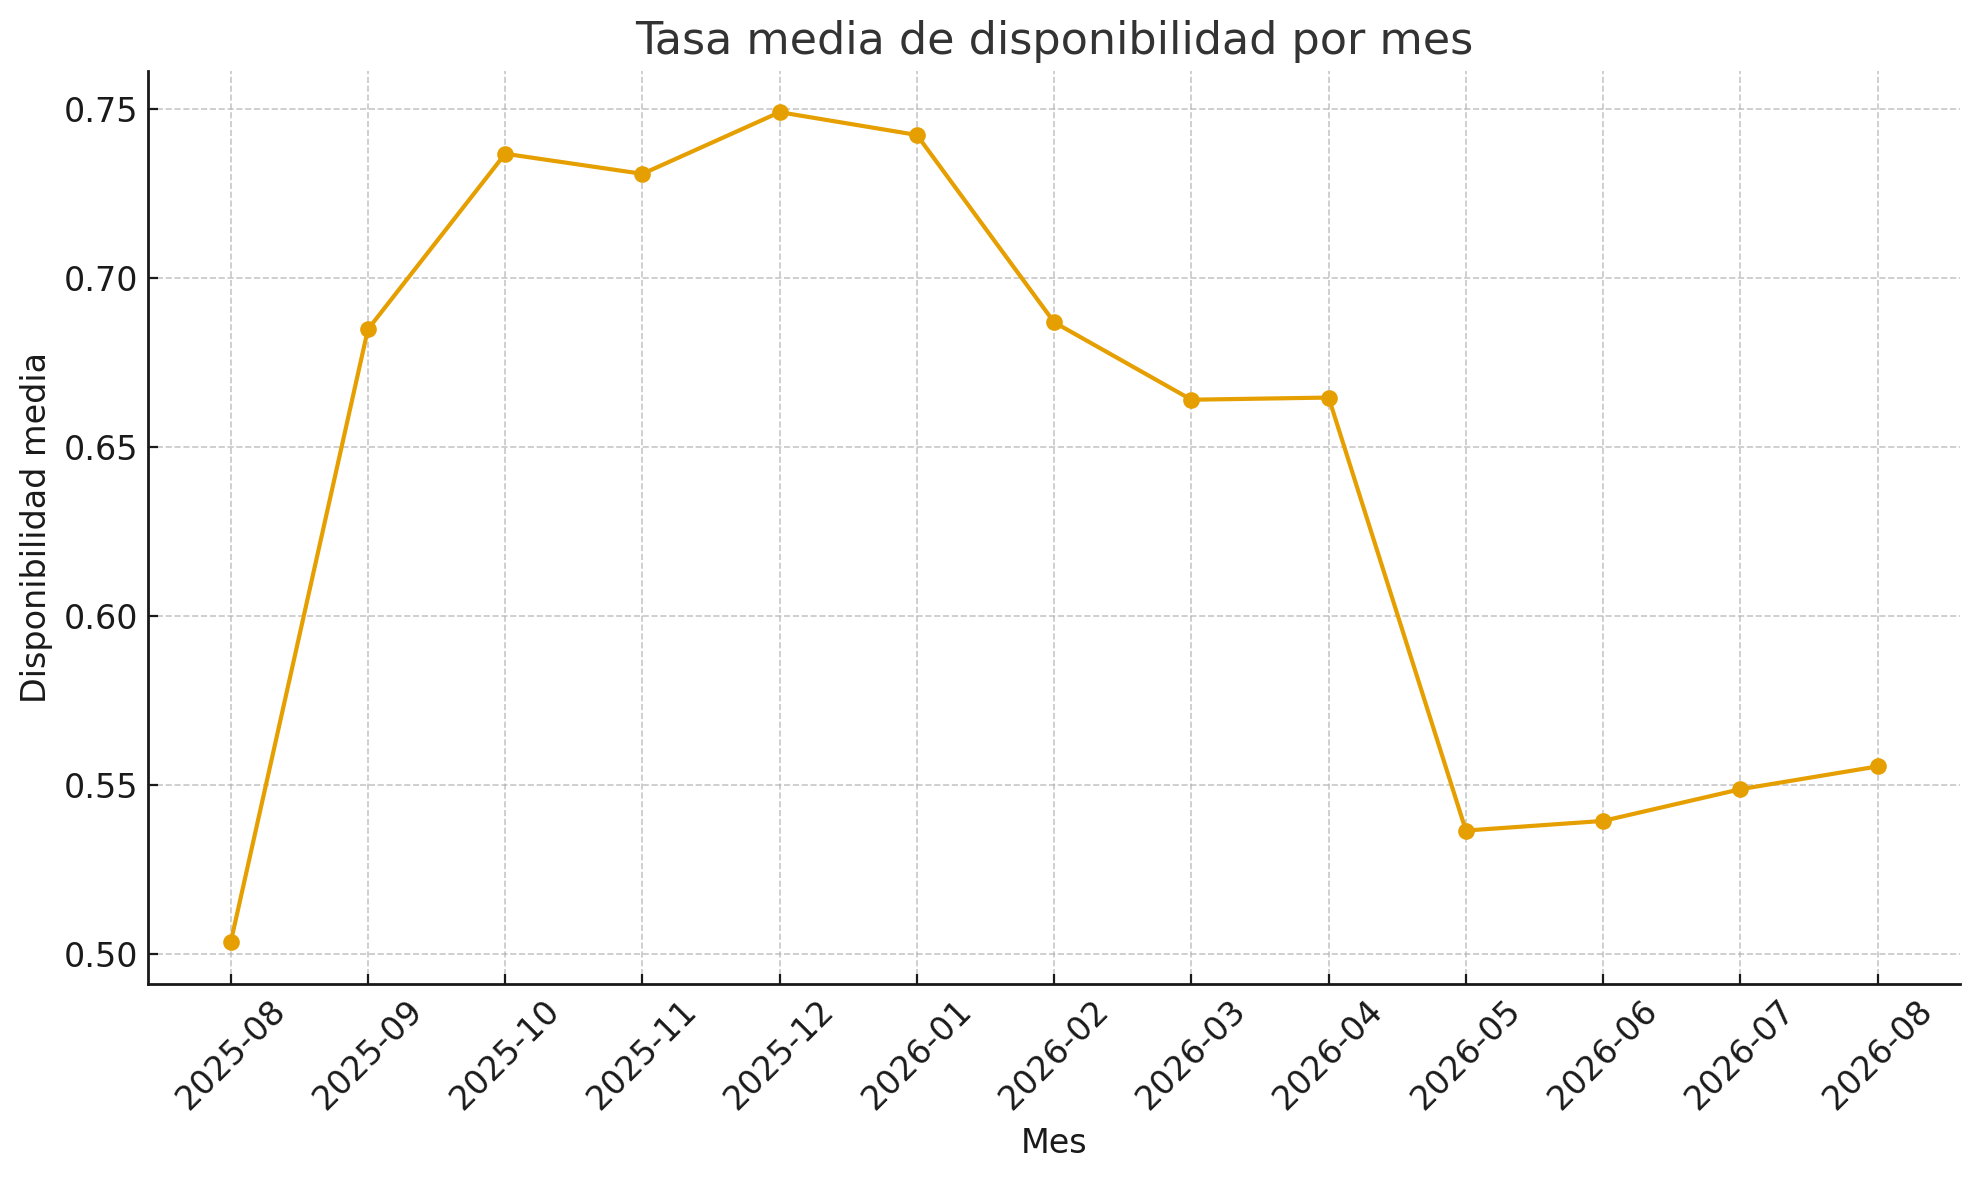

In [9]:
if {'date','available'}.issubset(calendar.columns):
    m = {'t':1,'true':1,'y':1,'f':0,'false':0,'n':0}
    tmp = calendar.copy()
    tmp['_avail_num'] = tmp['available'].astype(str).str.lower().map(m)
    tmp['_date'] = pd.to_datetime(tmp['date'], errors='coerce')
    tmp['yyyy_mm'] = tmp['_date'].dt.to_period('M').astype(str)
    series = tmp.groupby('yyyy_mm')['_avail_num'].mean().sort_index()
    if series.shape[0] > 0:
        plt.figure()
        plt.plot(series.index, series.values, marker='o')
        plt.title('Tasa media de disponibilidad por mes')
        plt.xticks(rotation=45)
        plt.xlabel('Mes'); plt.ylabel('Disponibilidad media')
        plt.tight_layout(); plt.show()
    else:
        print('Sin datos válidos para disponibilidad mensual.')
else:
    print('calendar no contiene columnas necesarias (date, available).')


**Lectura rápida:**  
- Picos/valleys por mes sugieren **estacionalidad** (meses con más/menos oferta efectiva).  
- Cruza esta señal con demanda (reservas) si luego obtienes `price` diario/ocupación para ajustar el **pricing estacional**.


### Boxplots (outliers visuales)
**Objetivo:** apoyar la decisión de **cap/winsorización**.


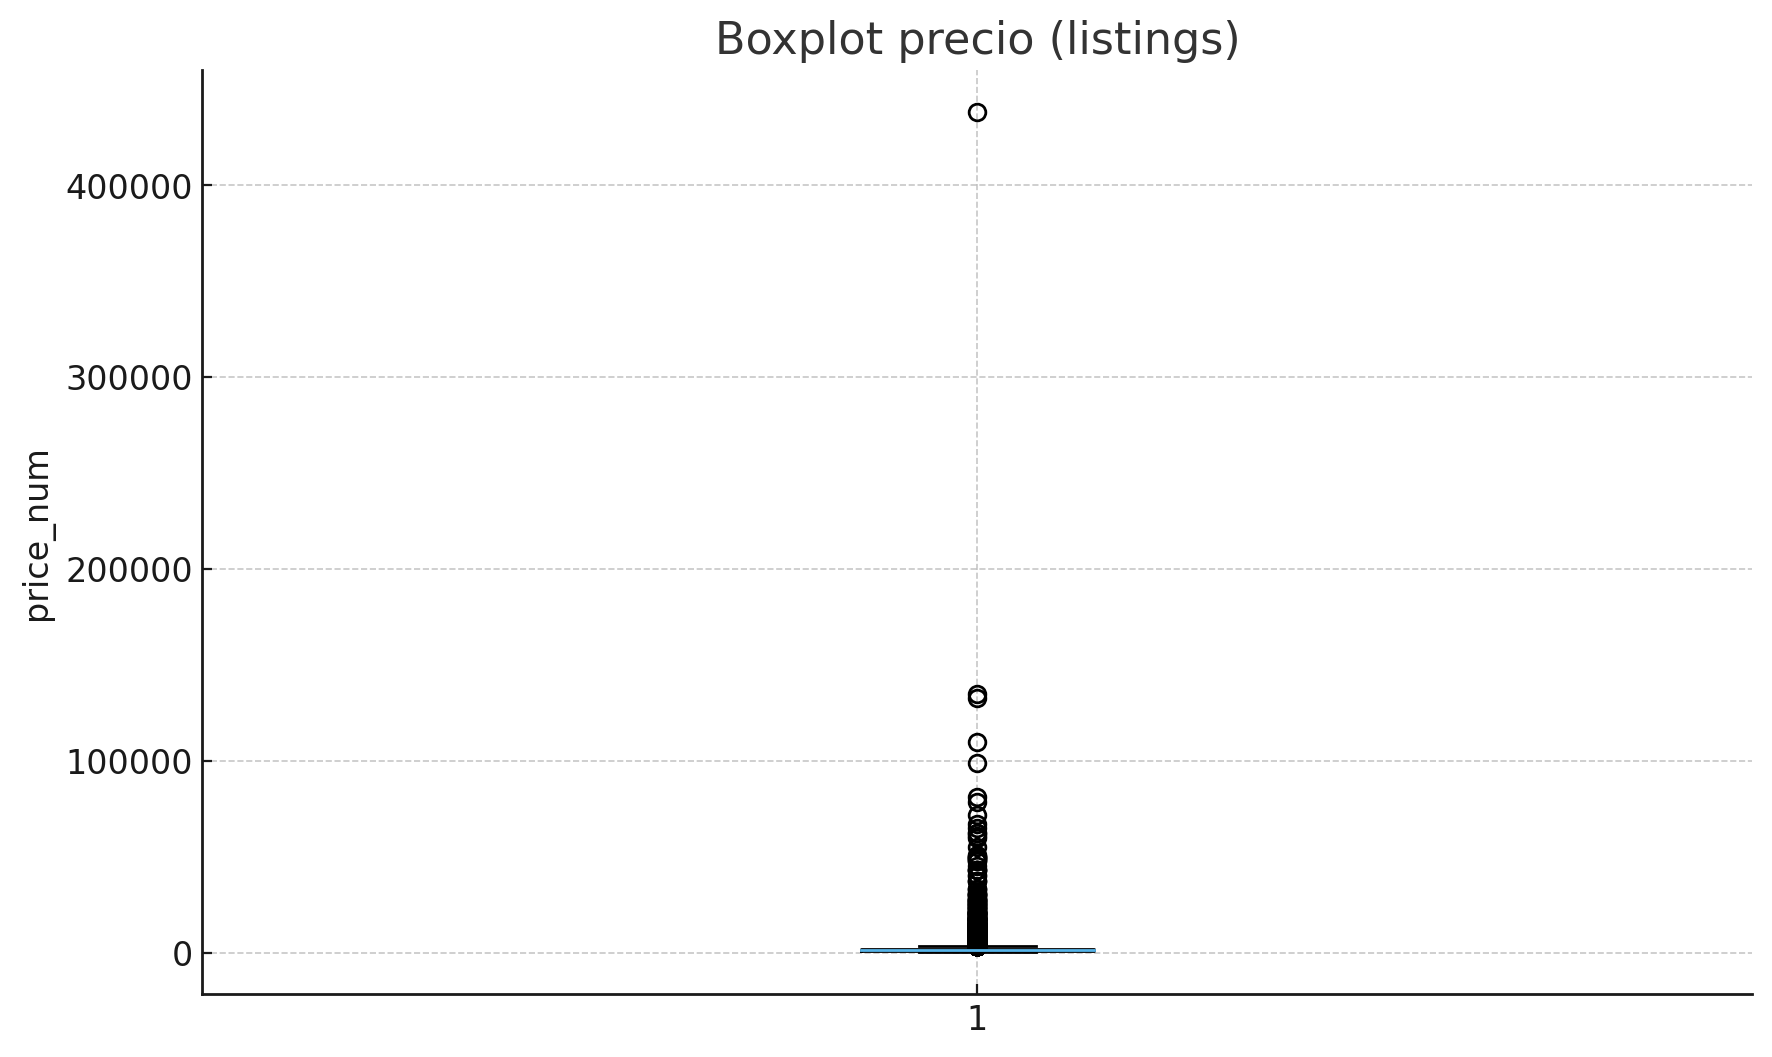

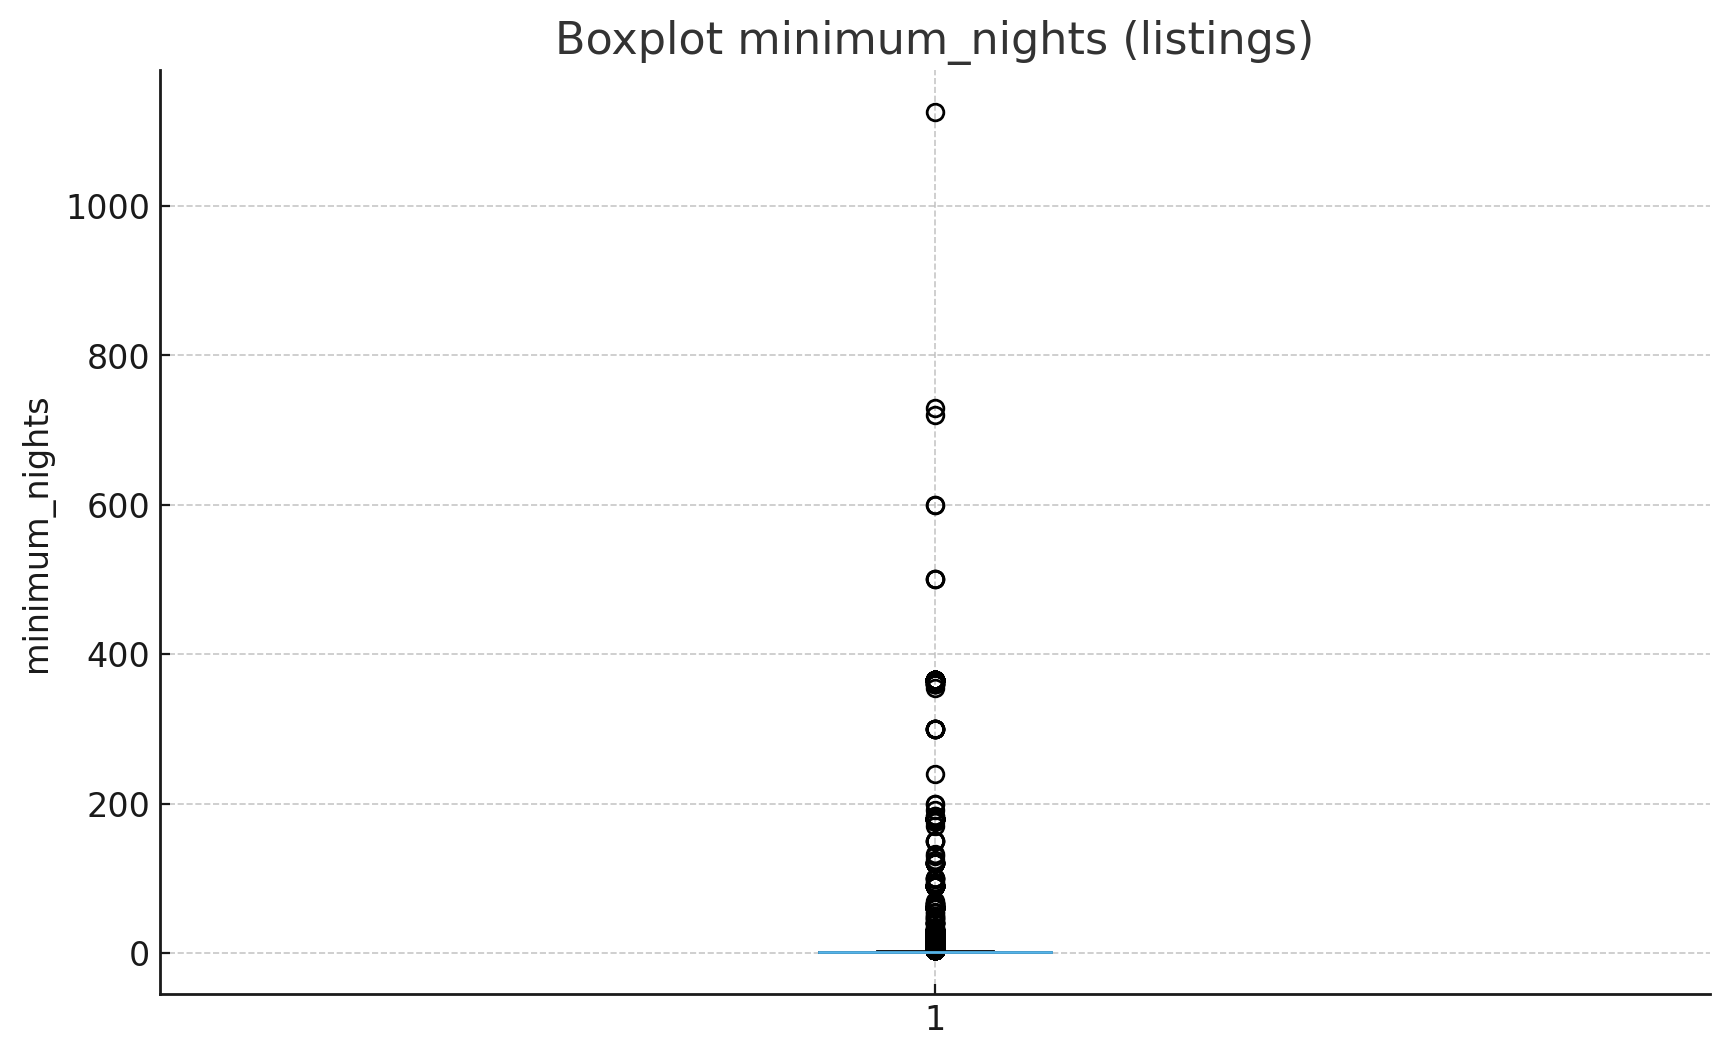

In [10]:
def boxplot_series(df, col, title=None):
    if col not in df.columns:
        print(f'No existe {col}'); return
    s = pd.to_numeric(df[col], errors='coerce').dropna()
    if s.empty:
        print(f'Sin datos para {col}'); return
    plt.figure()
    plt.boxplot(s, vert=True, showfliers=True)
    plt.title(title or f'Boxplot {col}')
    plt.ylabel(col)
    plt.show()

if 'price_num' in listings.columns: boxplot_series(listings, 'price_num', 'Boxplot precio (listings)')
if 'minimum_nights' in listings.columns: boxplot_series(listings, 'minimum_nights', 'Boxplot minimum_nights (listings)')


**Conclusión visual:**  
Las figuras confirman la presencia de **colas largas y valores extremos** en precio y noches mínimas, la relación positiva de precio con capacidad/amenidades, y patrones de **estacionalidad** potencial en la disponibilidad.  
Estas evidencias respaldan las transformaciones recomendadas en 2.4: *cap/winsorizar*, `log1p(price)`, desanidar `amenities` y agregar por mes para análisis temporal.
